In [1]:
pip install pandas openpyxl


In [2]:
pip install pandas numpy openpyxl


In [3]:
import pandas as pd

# Load the uploaded Excel file
file_path = '/content/Inventory automation project.xlsx'
excel_data = pd.ExcelFile(file_path)

# Load the data from the first sheet
data = pd.read_excel(file_path, sheet_name='Sheet1')


In [4]:
import numpy as np
from scipy.optimize import linprog

# Extract the data from the dataframe
item_names = data['Item Name']
prices = data['Price per Quantity']
max_ordering = data['Max Ordering']

# Define the cost function coefficients (negative because we are maximizing)
c = -np.array(prices)

# Define the inequality constraint matrix (Ax <= b)
A = np.array([prices])
b = np.array([300])

# Define the bounds for each variable
bounds = [(0, max_ordering[idx]) for idx in range(len(item_names))]

# Solve the linear programming problem
result = linprog(c, A_ub=A, b_ub=b, bounds=bounds, method='highs')

# Extract the optimal order quantities
optimal_order_quantities = result.x
order_quantities = {item_names[idx]: optimal_order_quantities[idx] for idx in range(len(item_names))}


In [5]:
from datetime import datetime, timedelta

# Extract the replenishment days data
replenishment_days = data['No of days for replenishment']

# Define the start date
start_date = datetime.strptime("22/07/2024", "%d/%m/%Y")

# Create an empty list to store the schedule
schedule = []

# Generate the order schedule for the next 1000 days
for day in range(1000):
    current_date = start_date + timedelta(days=day)
    items_to_order = []
    for idx, item in enumerate(item_names):
        # Check if today is a replenishment day for this item
        if day % replenishment_days[idx] == 0 and order_quantities[item] > 0:
            items_to_order.append(item)
    if items_to_order:
        schedule.append({"Date": current_date, "Items": ", ".join(items_to_order)})

# Convert the schedule to a DataFrame
schedule_df = pd.DataFrame(schedule)

# Save the schedule to an Excel file
output_file_path = 'Order_Schedule.xlsx'
schedule_df.to_excel(output_file_path, index=False)

# Display the schedule
print(schedule_df.head())


        Date                                              Items
0 2024-07-22  Eggs, Honey, Bread, Peanut Butter, Hazelnut bu...
1 2024-07-28                                              Bread
2 2024-07-29                 Cucumber, Cantelopes, Nuts, Banana
3 2024-08-01                                     Onion, Chicken
4 2024-08-02                                               Eggs


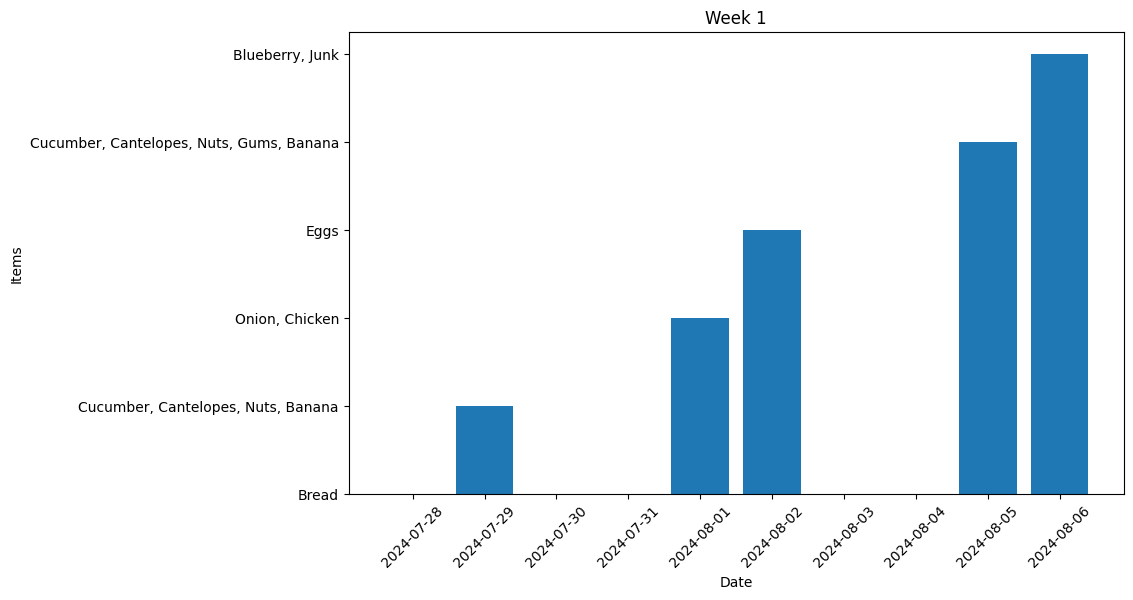

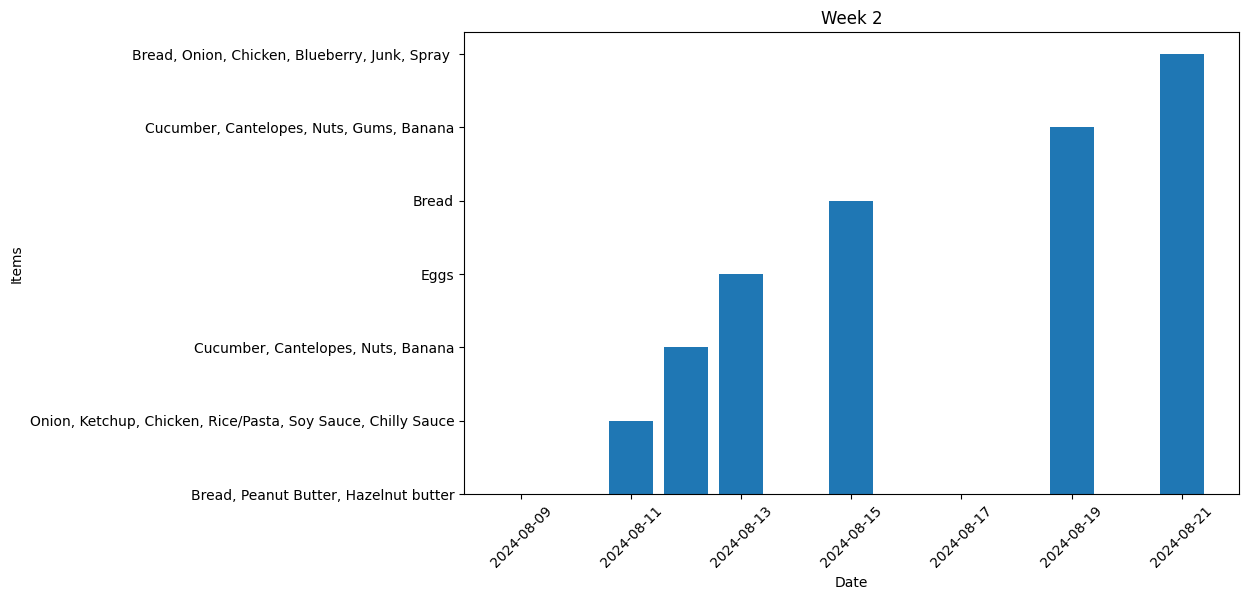

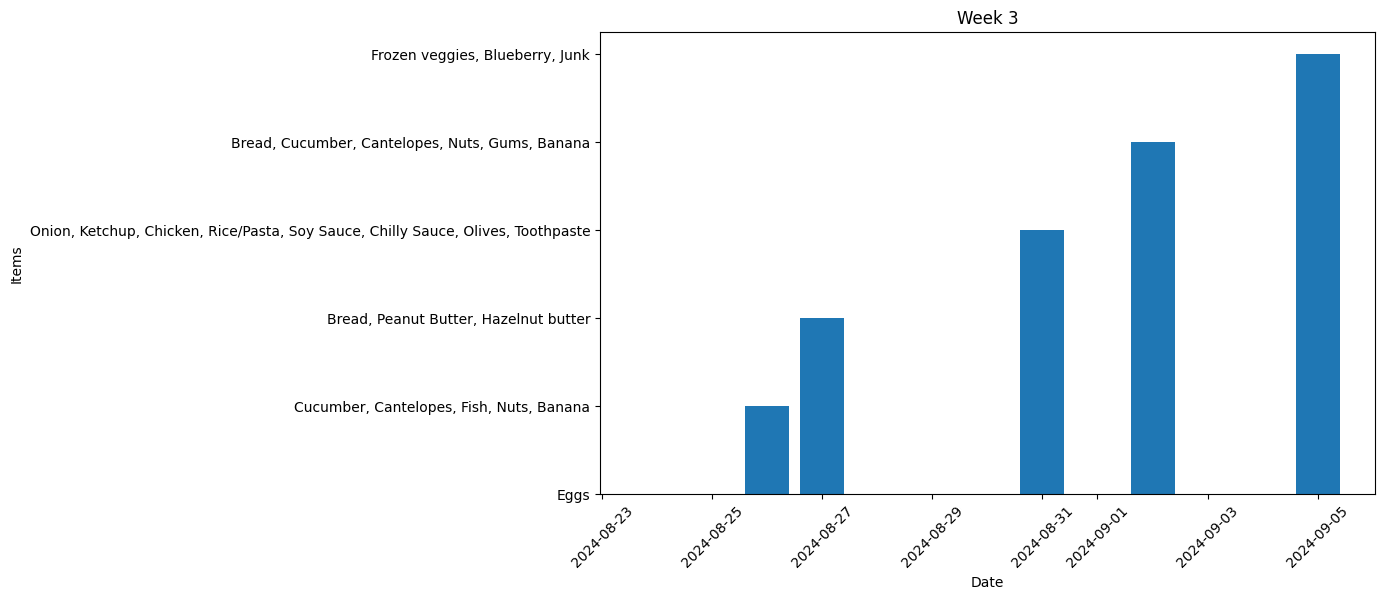

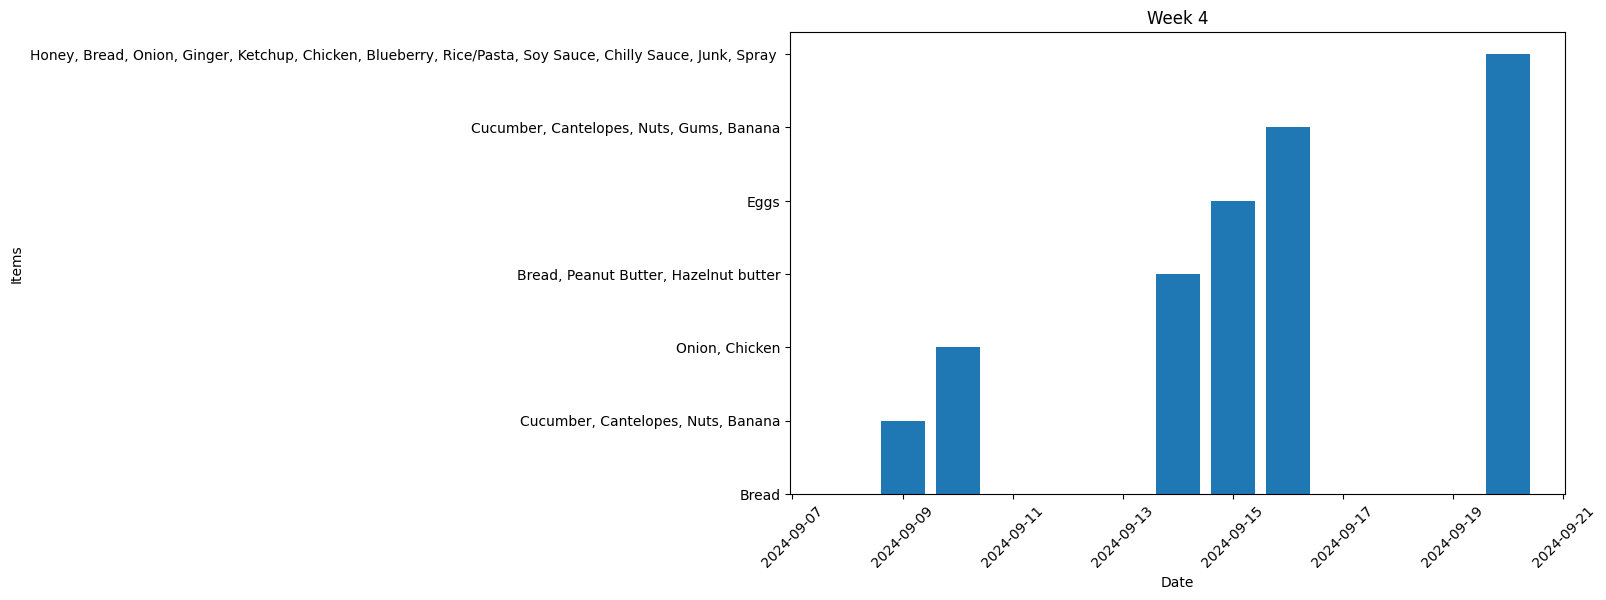

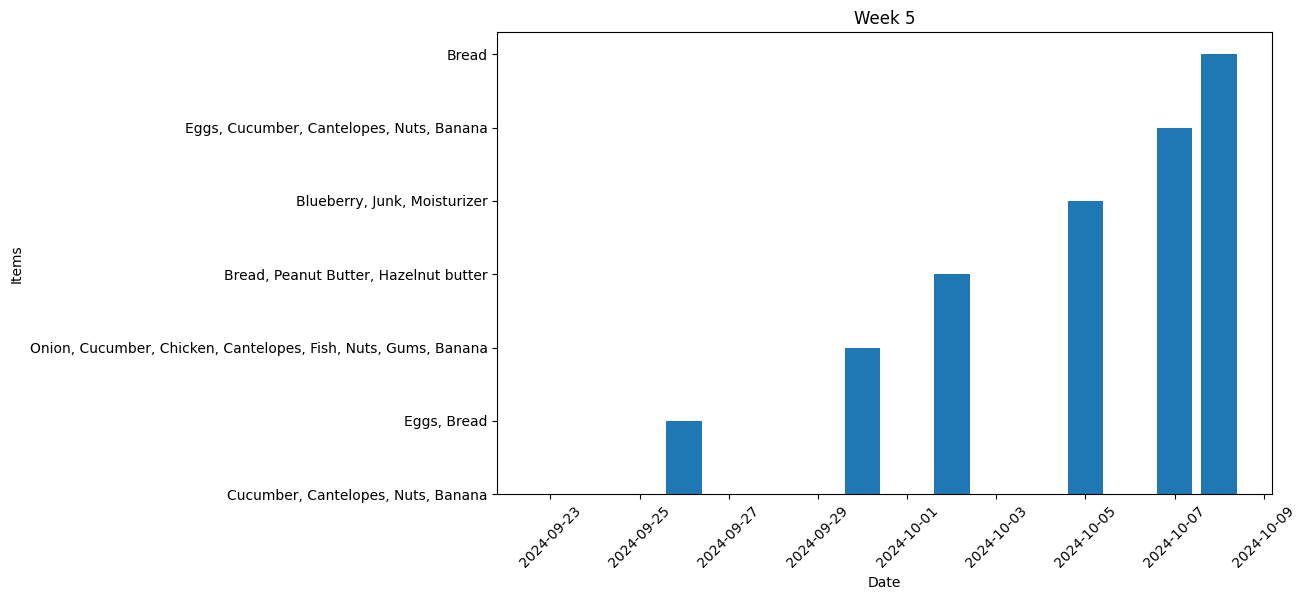

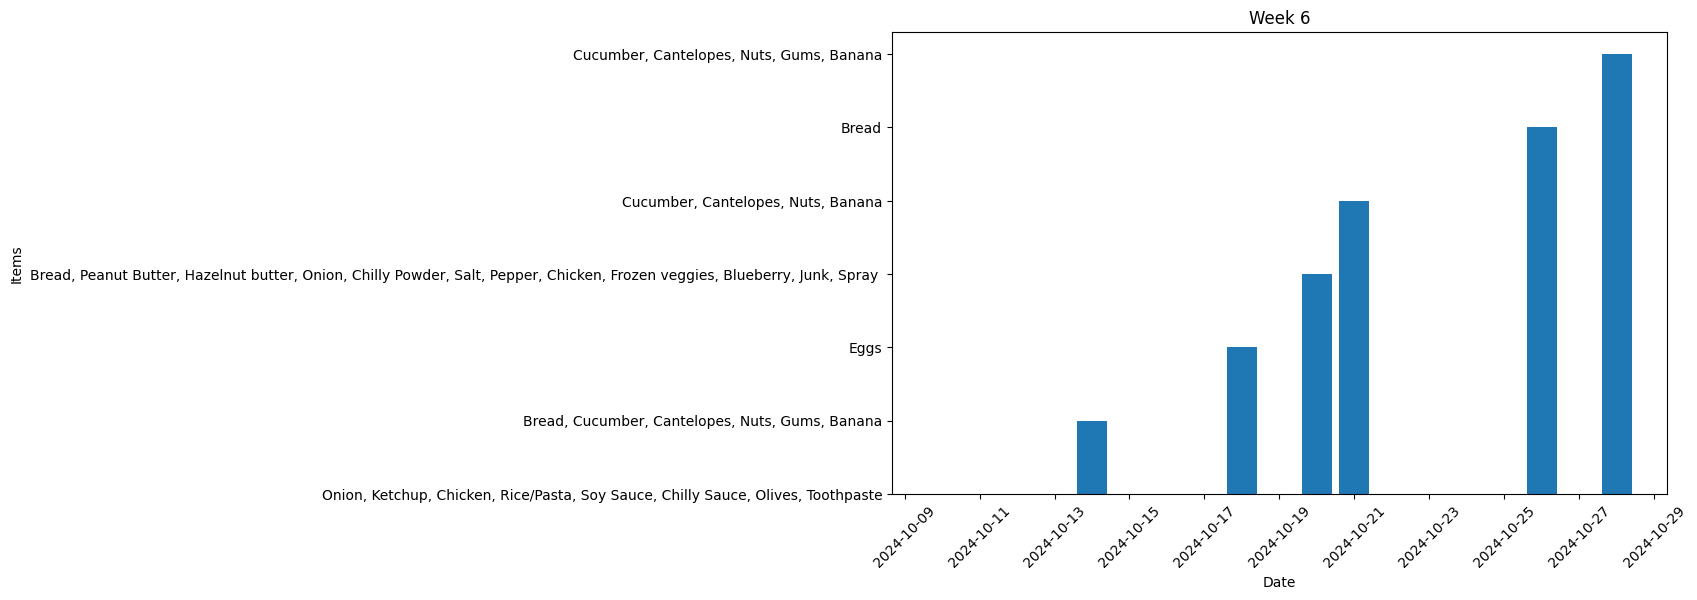

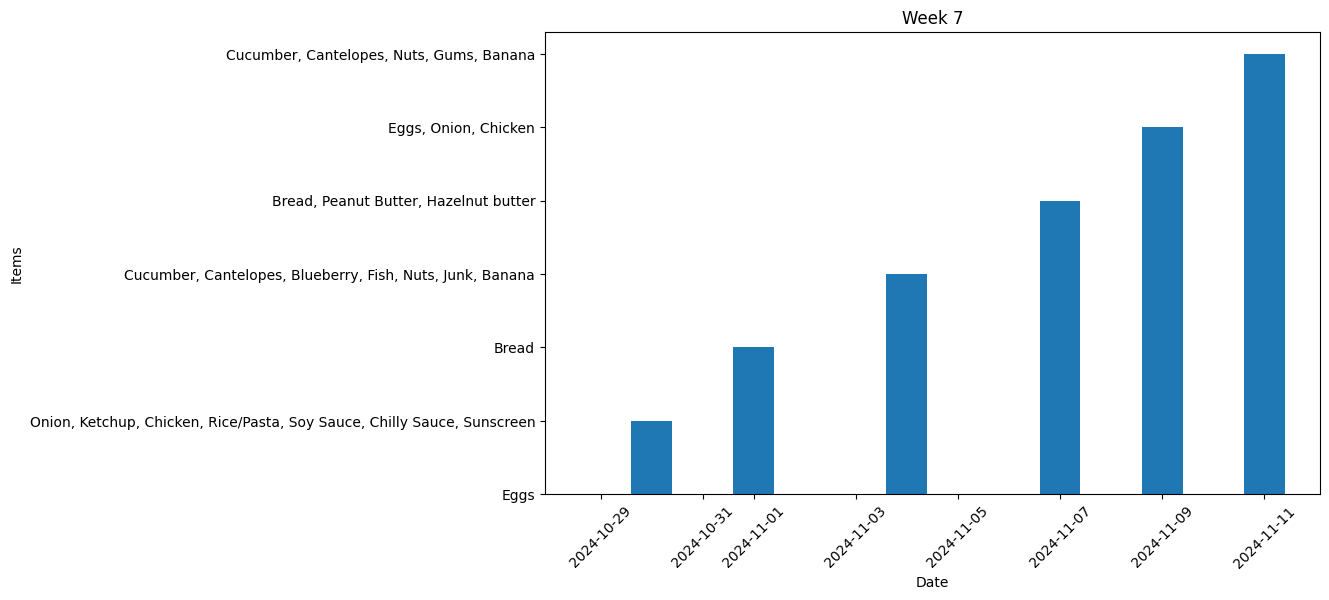

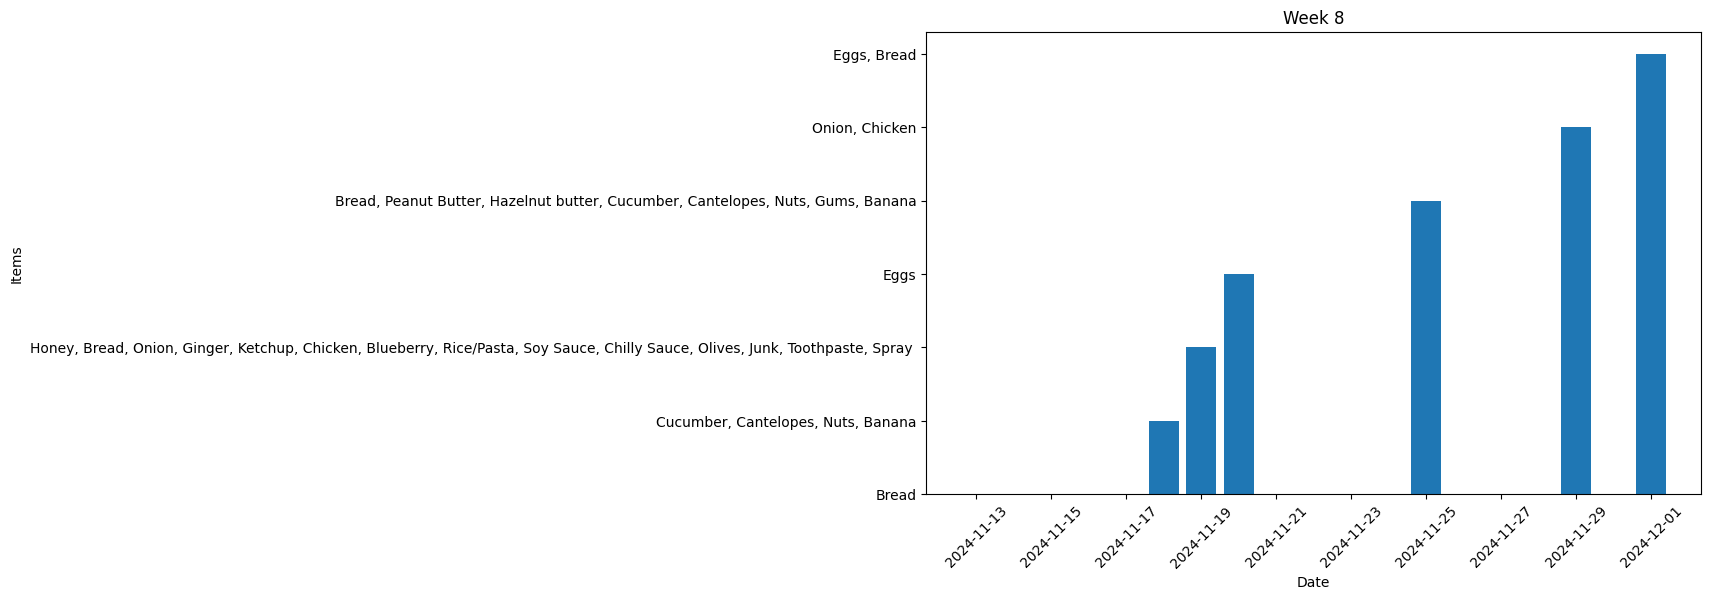

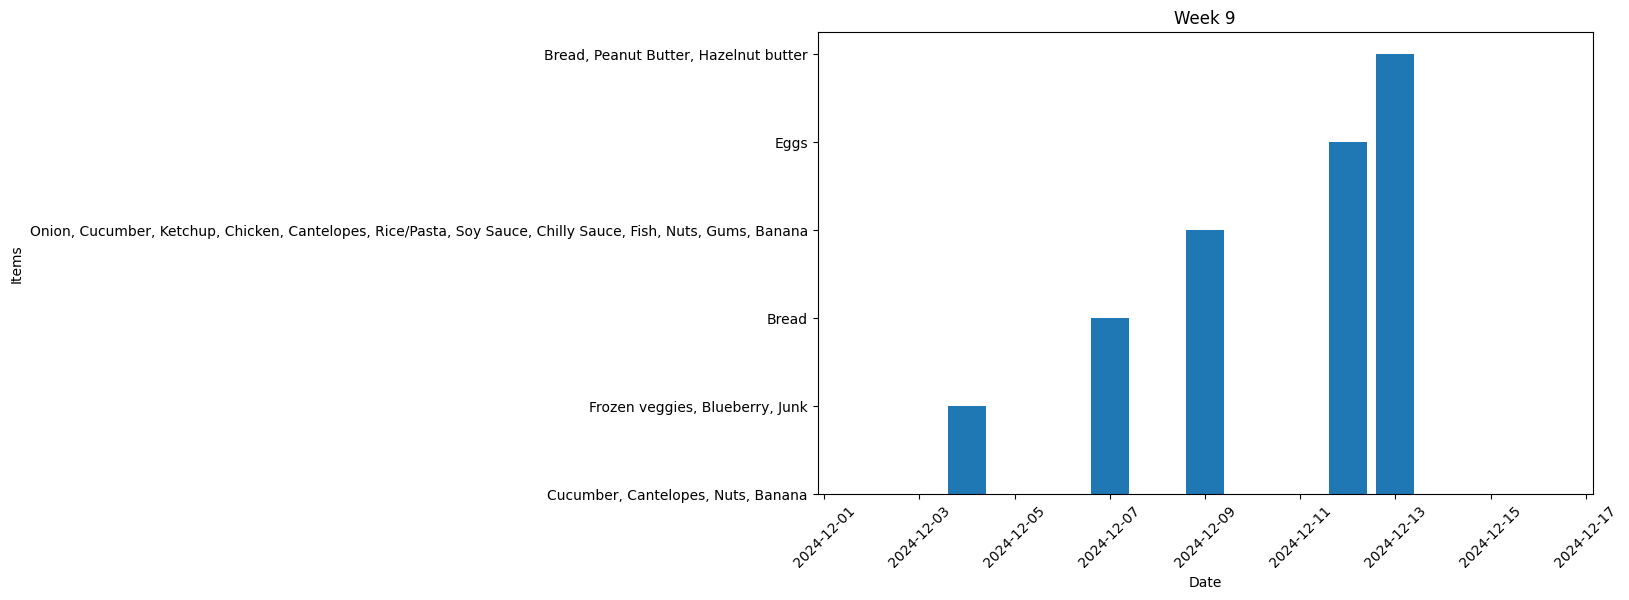

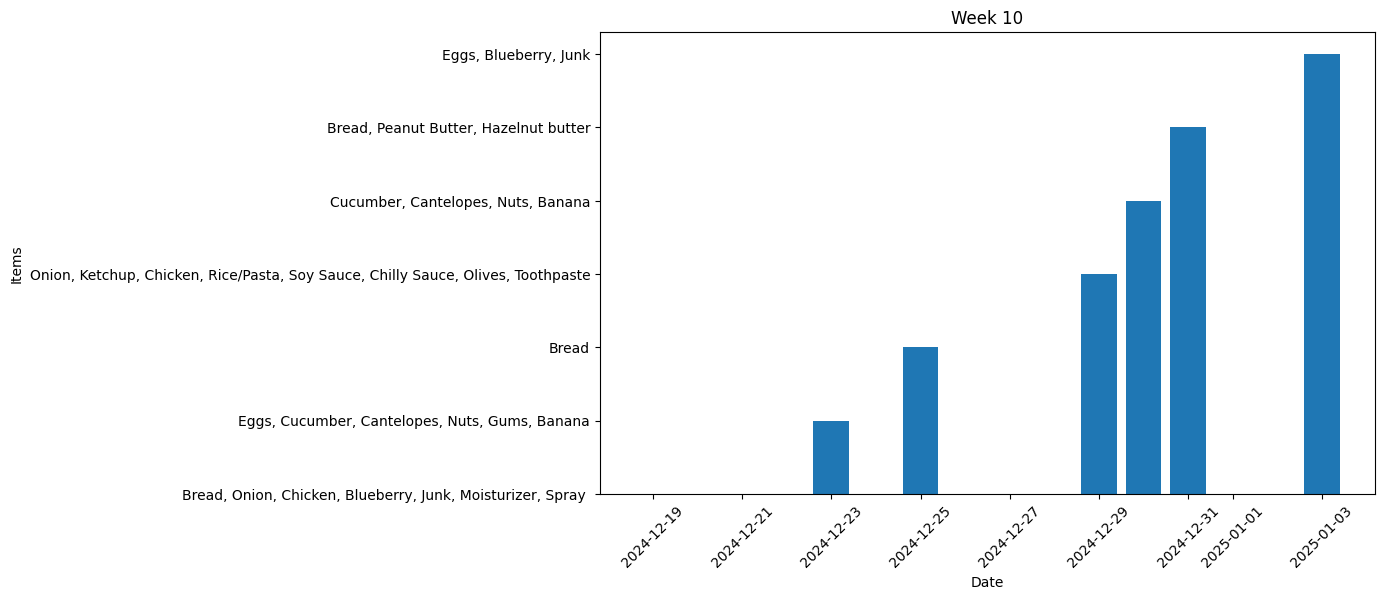

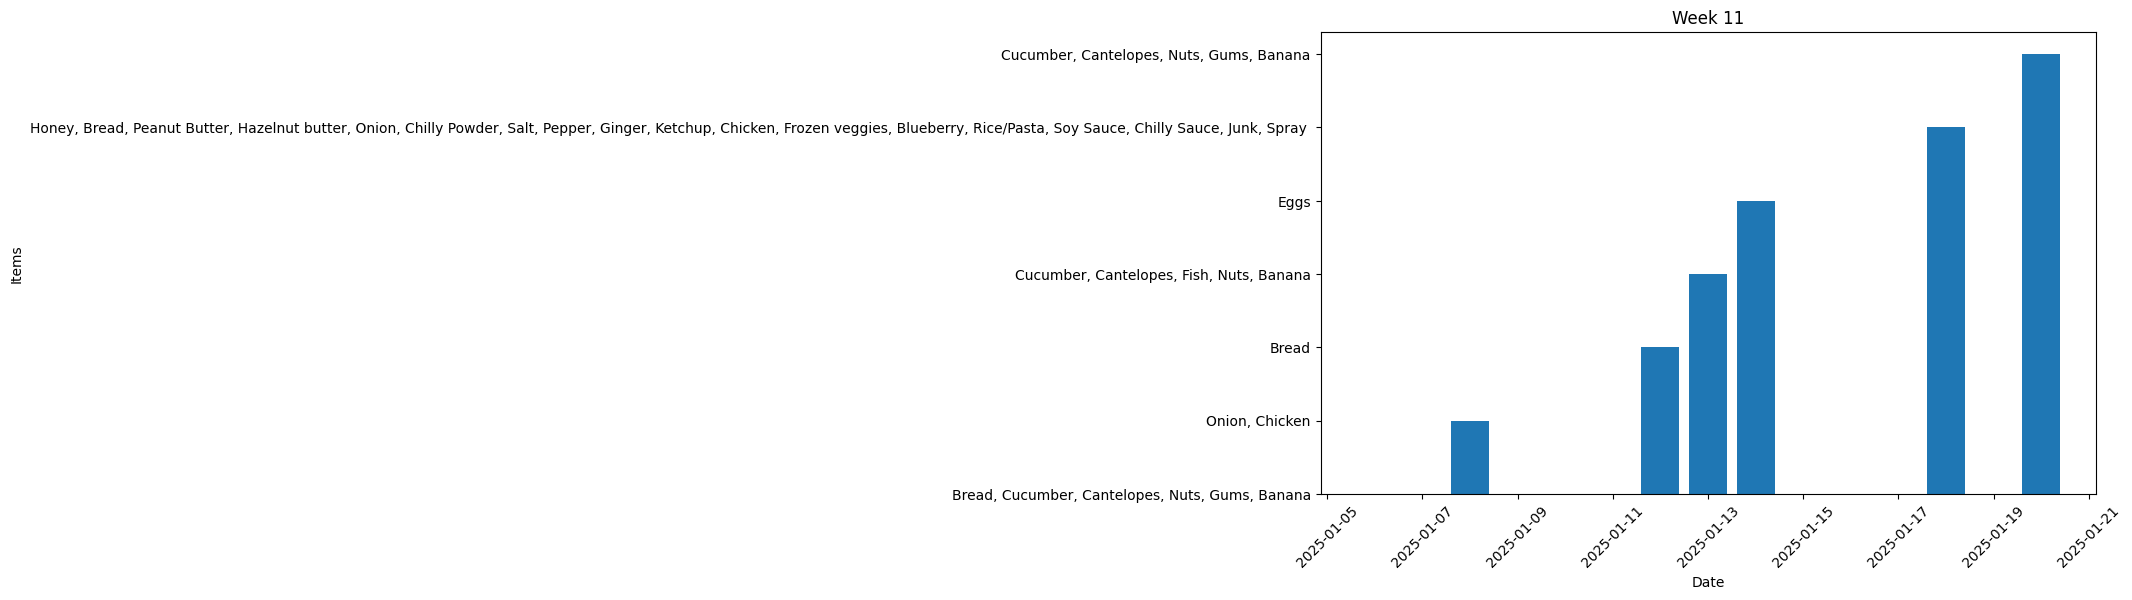

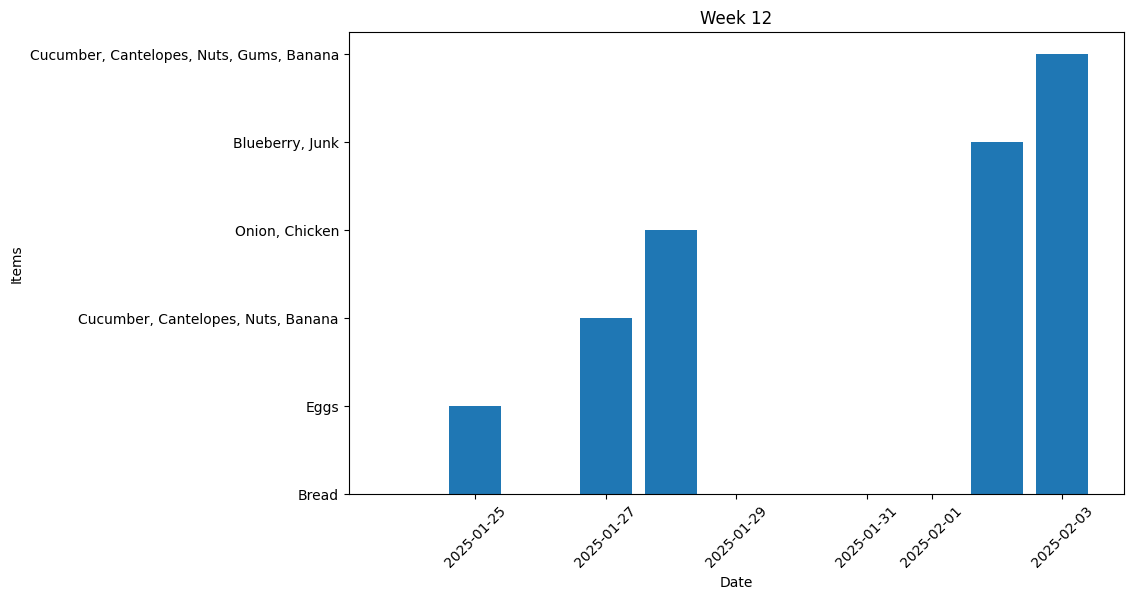

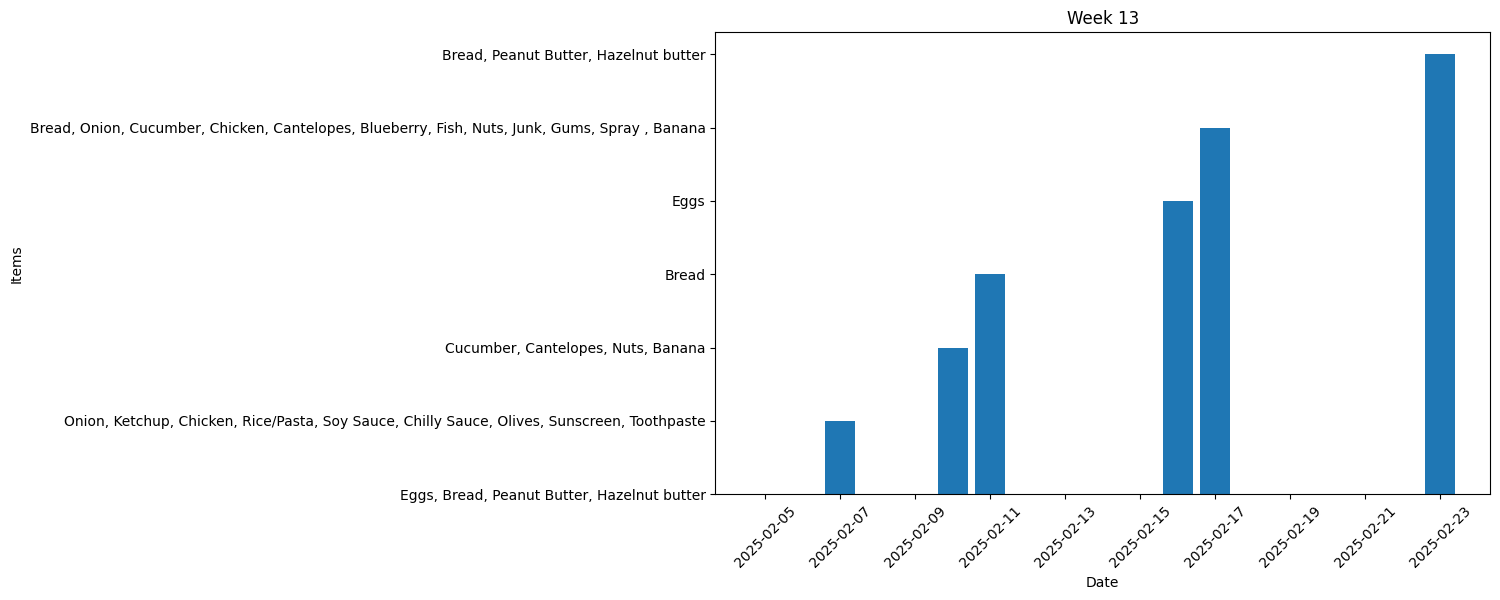

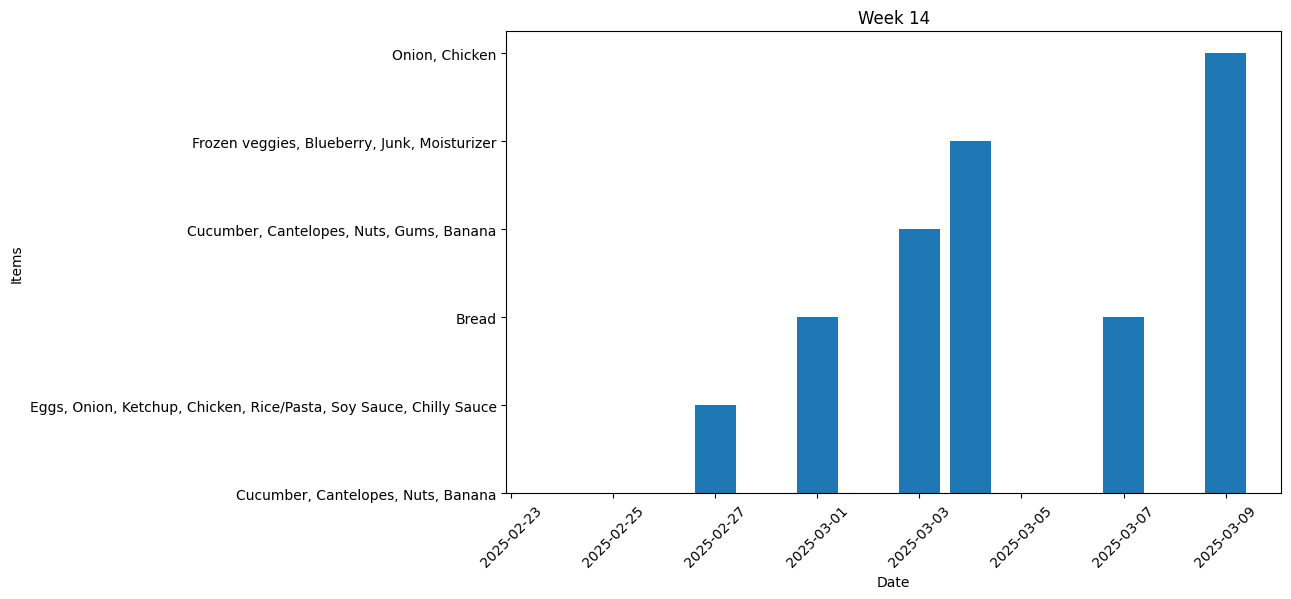

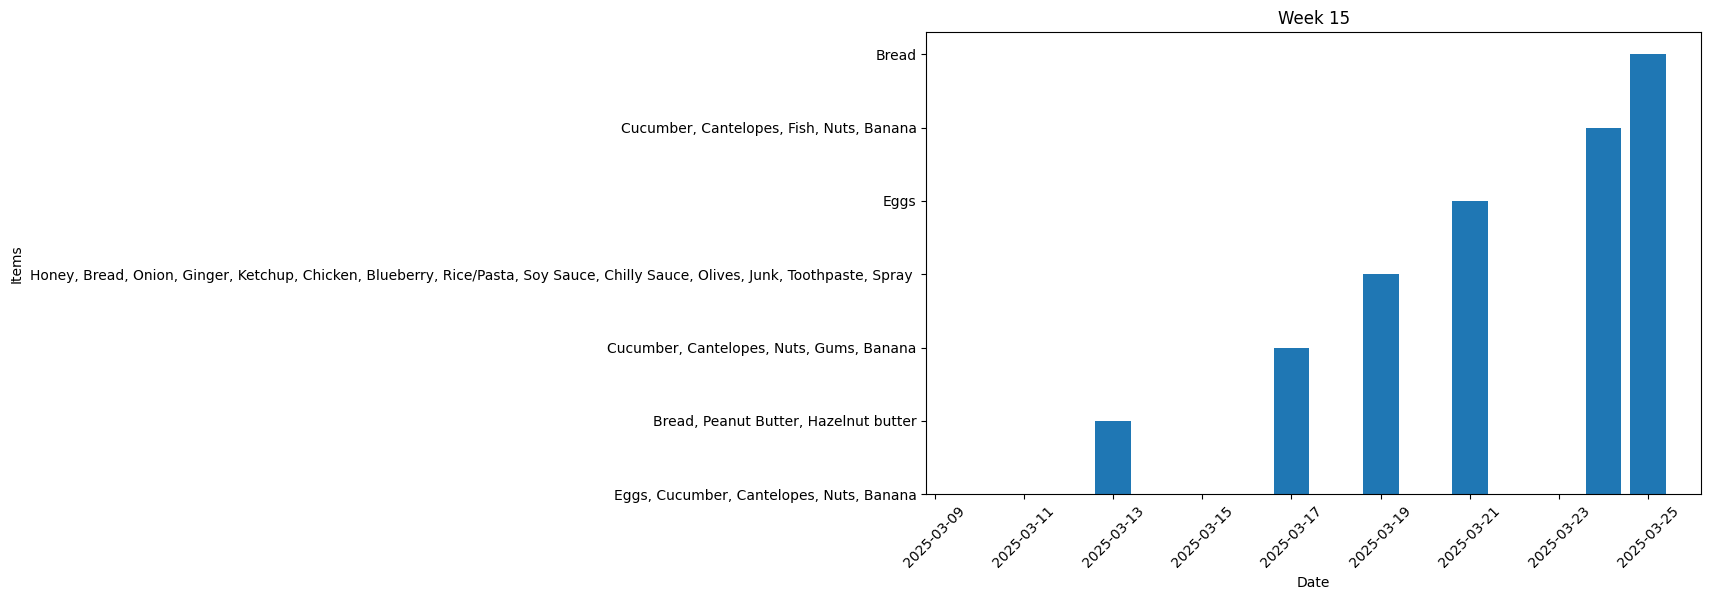

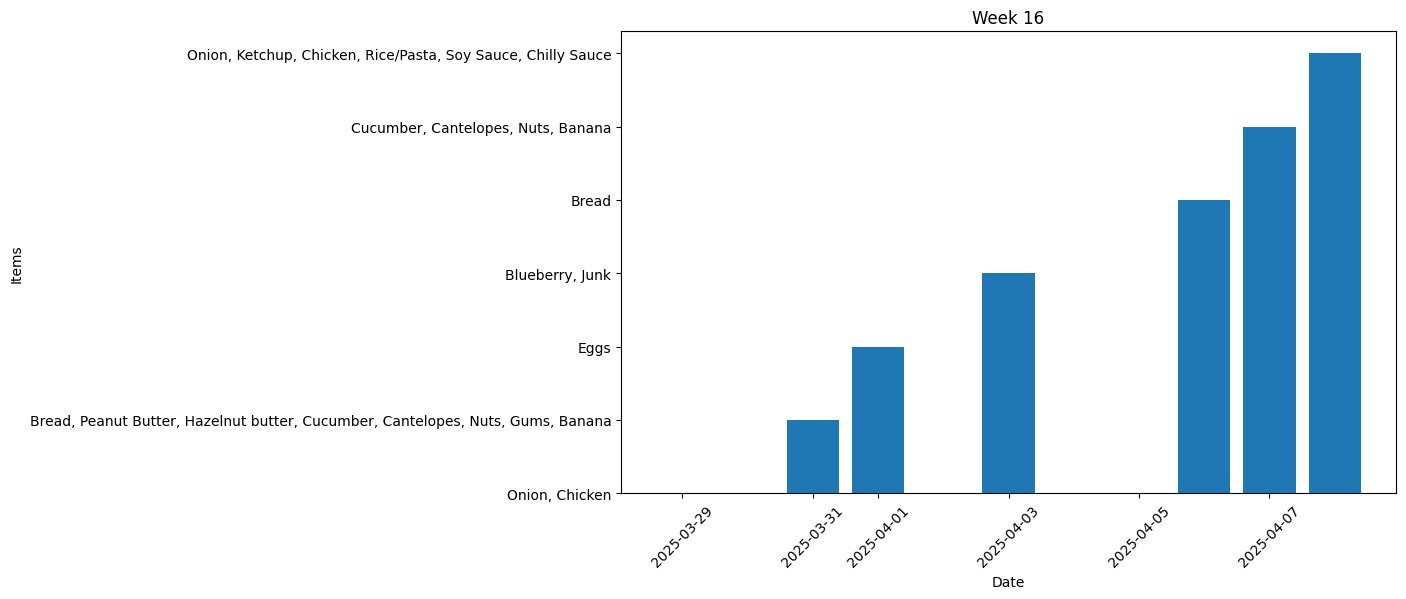

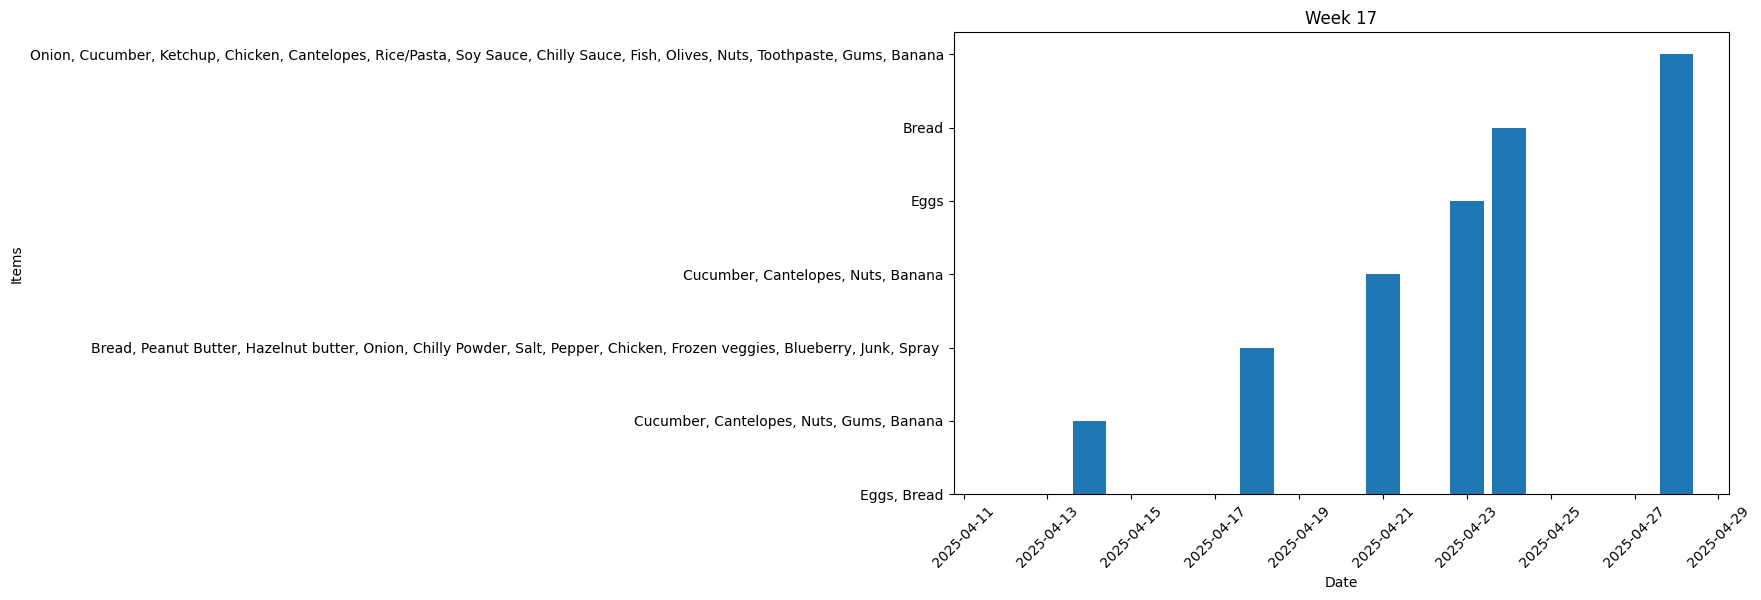

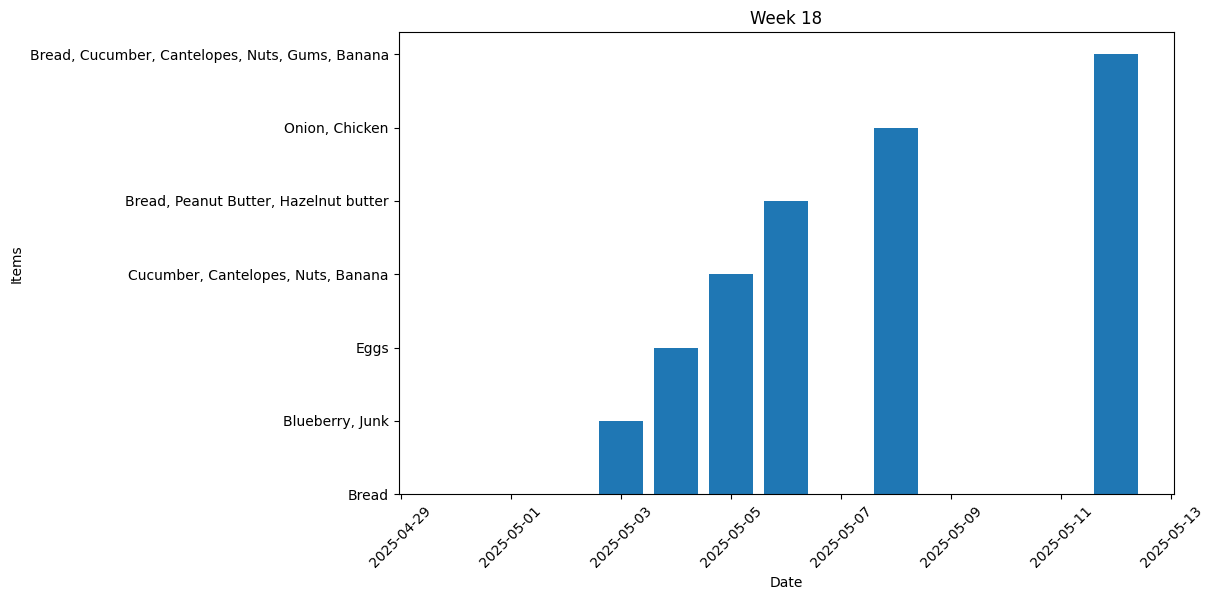

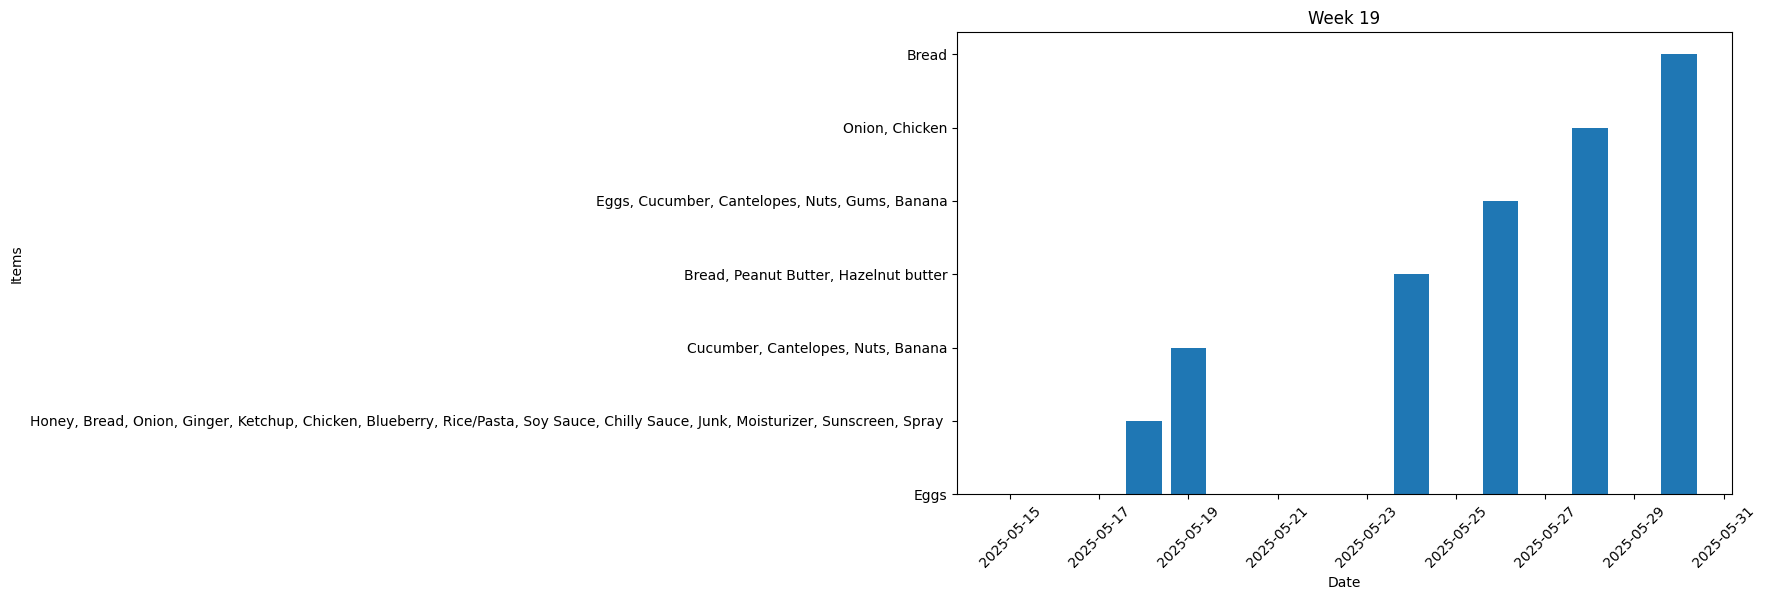

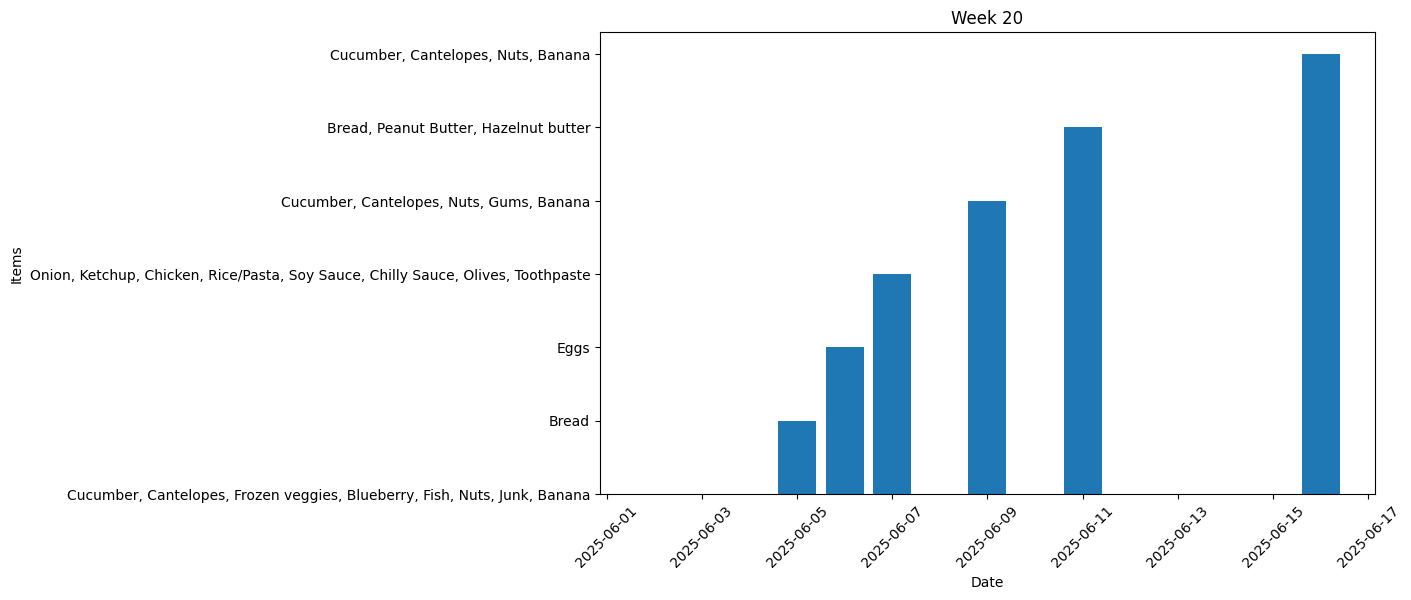

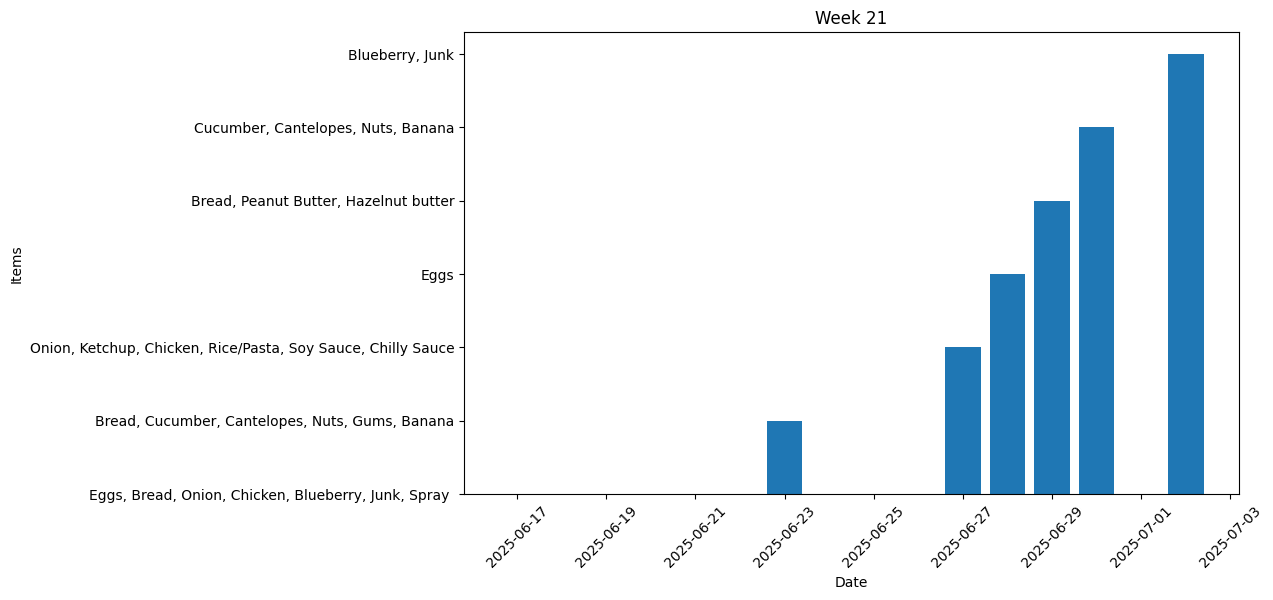

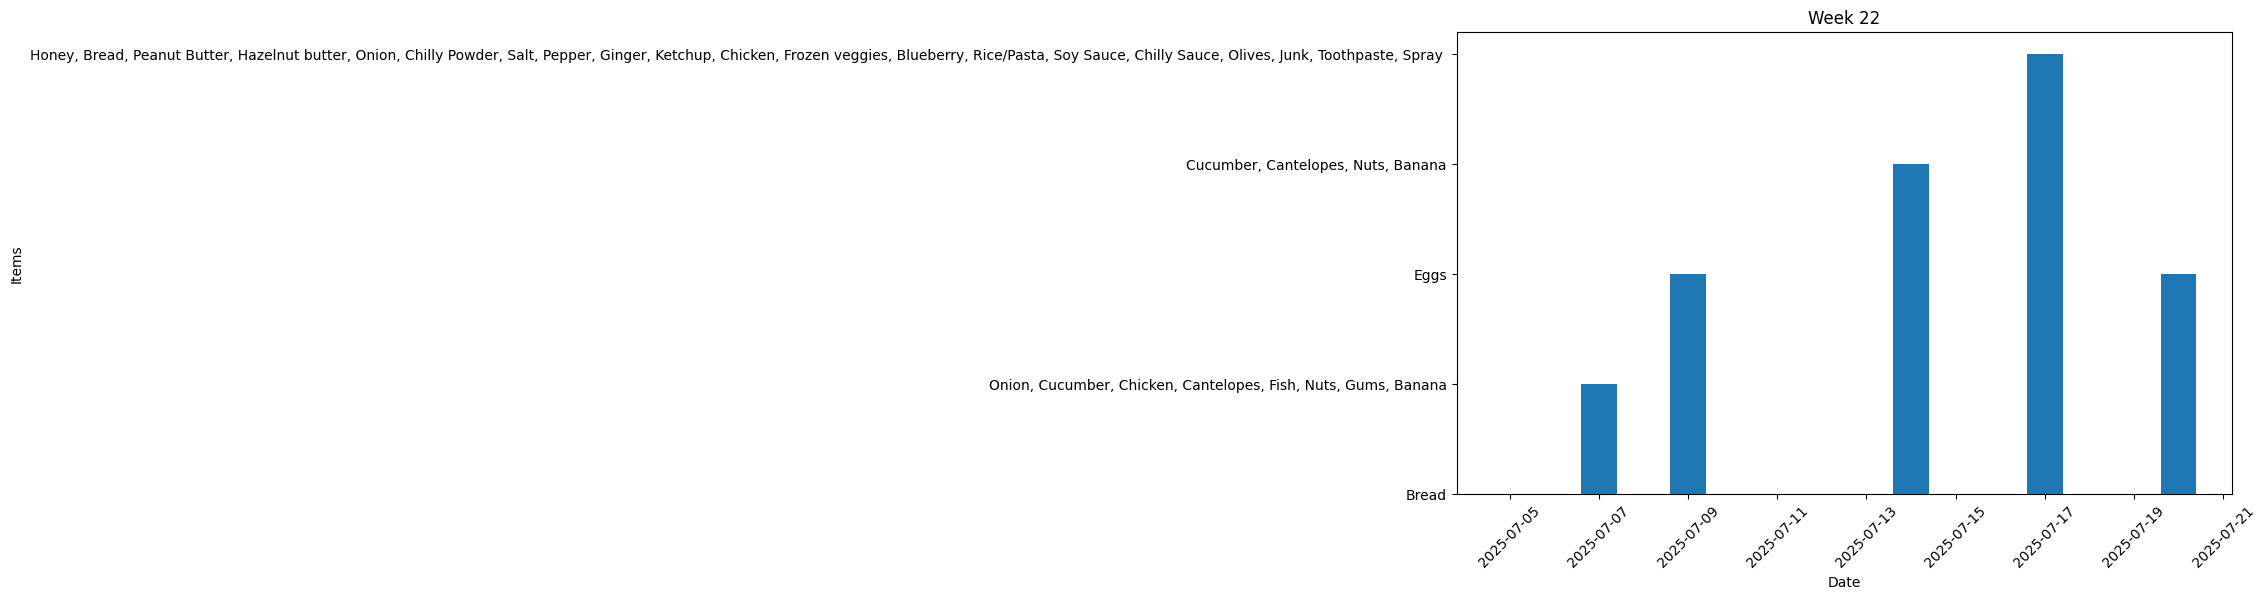

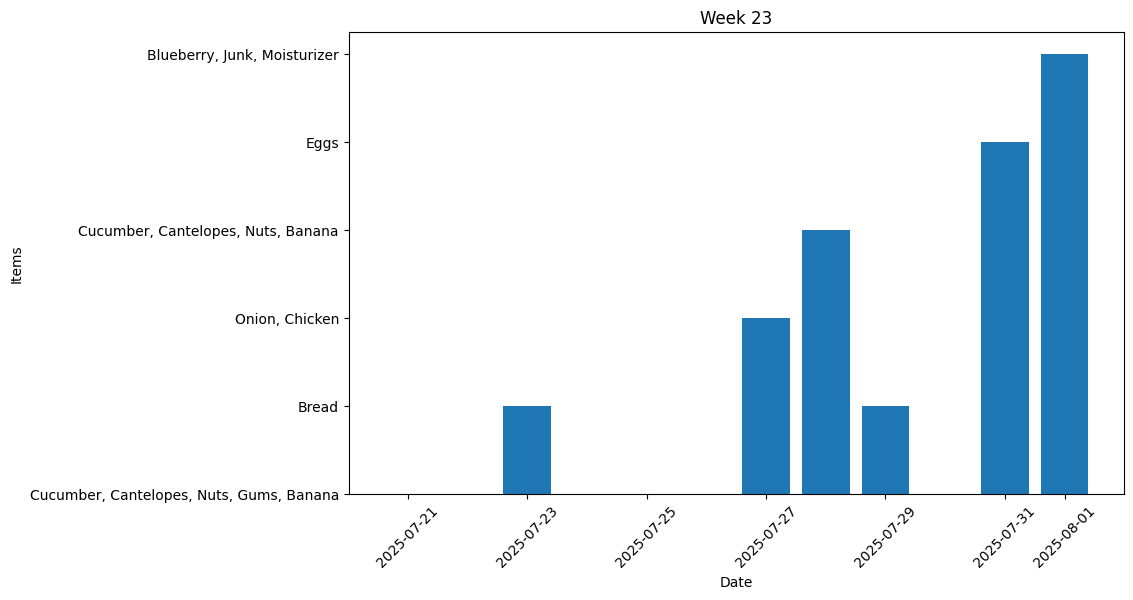

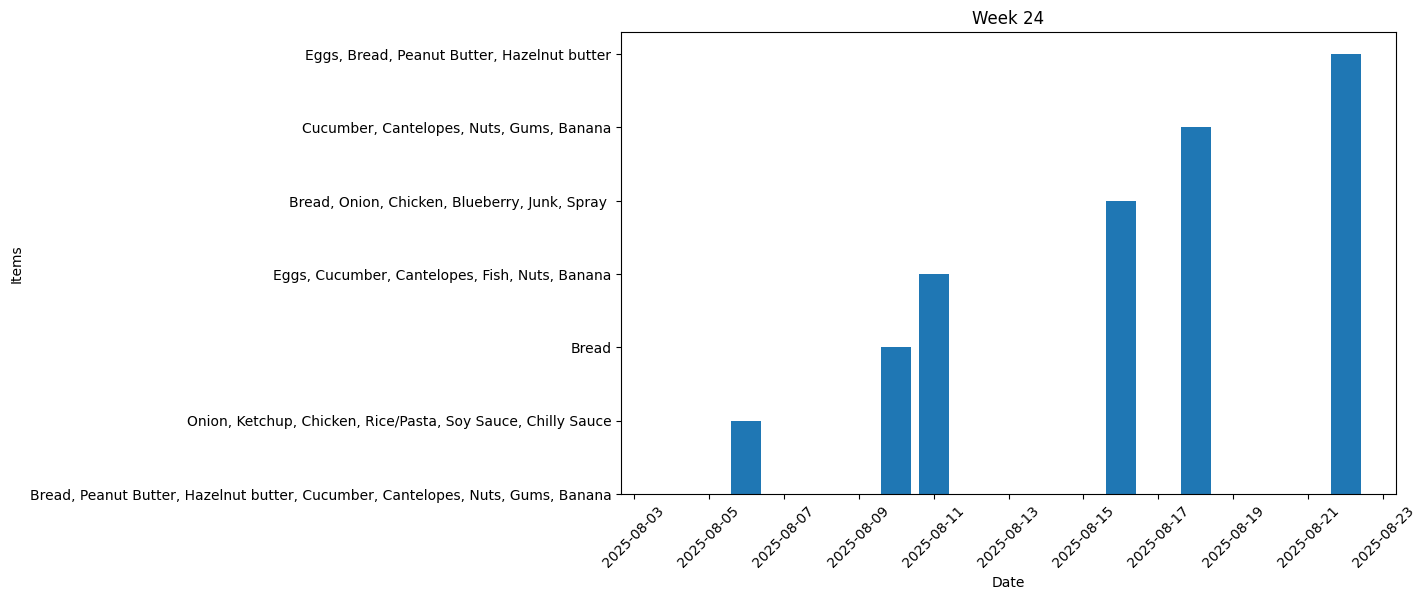

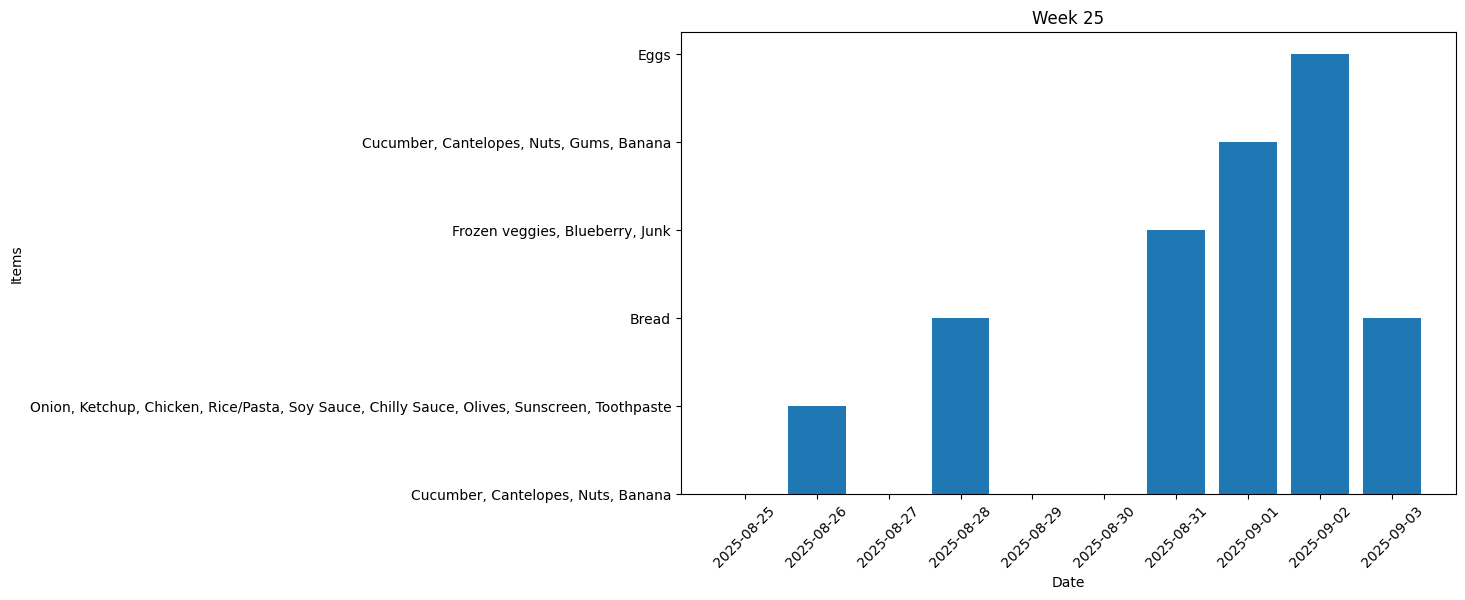

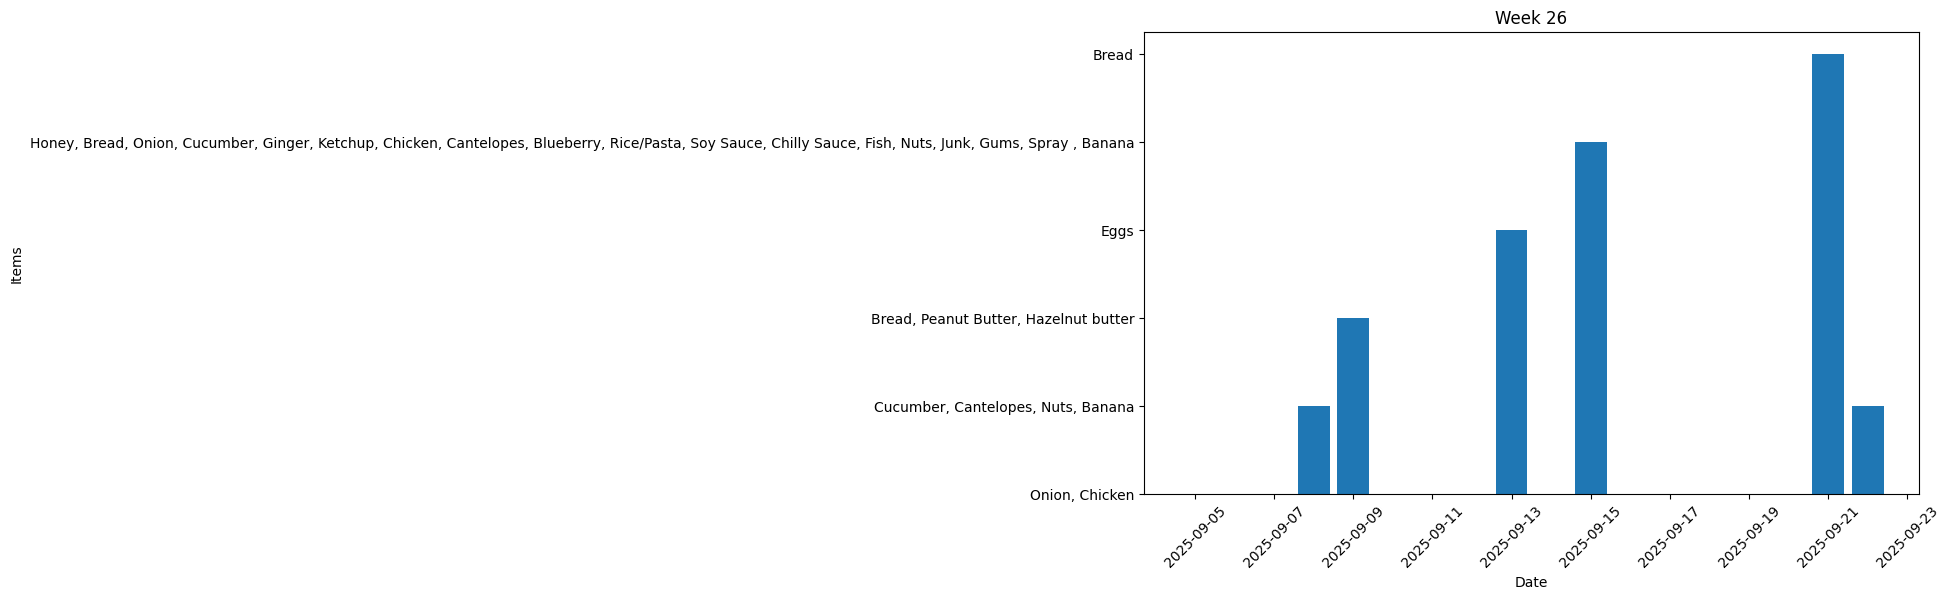

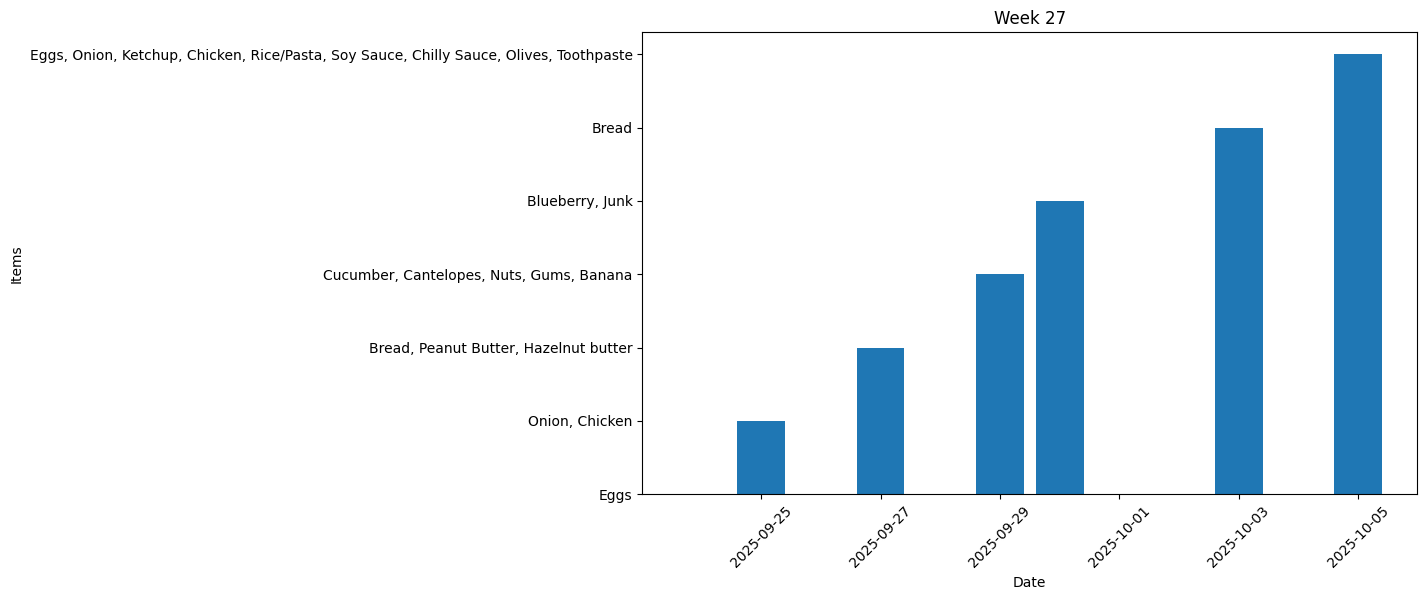

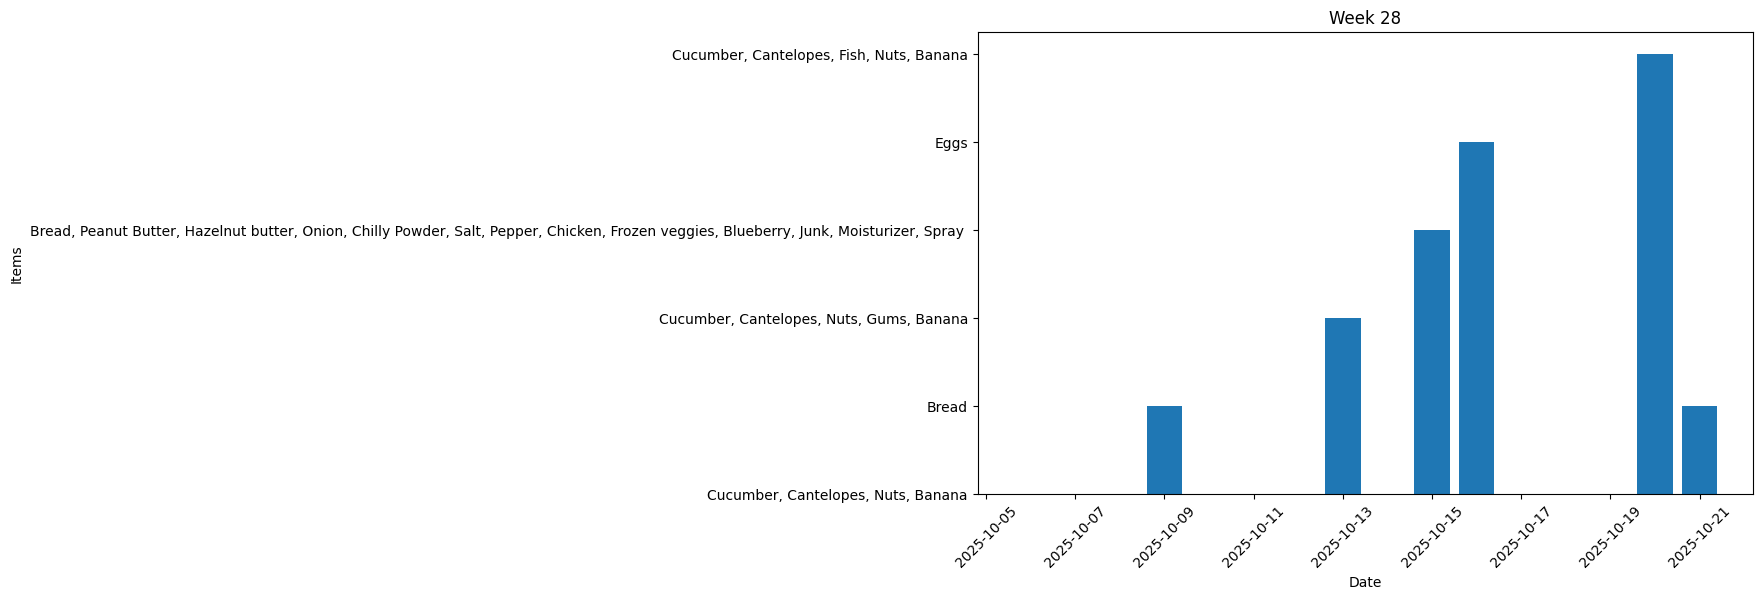

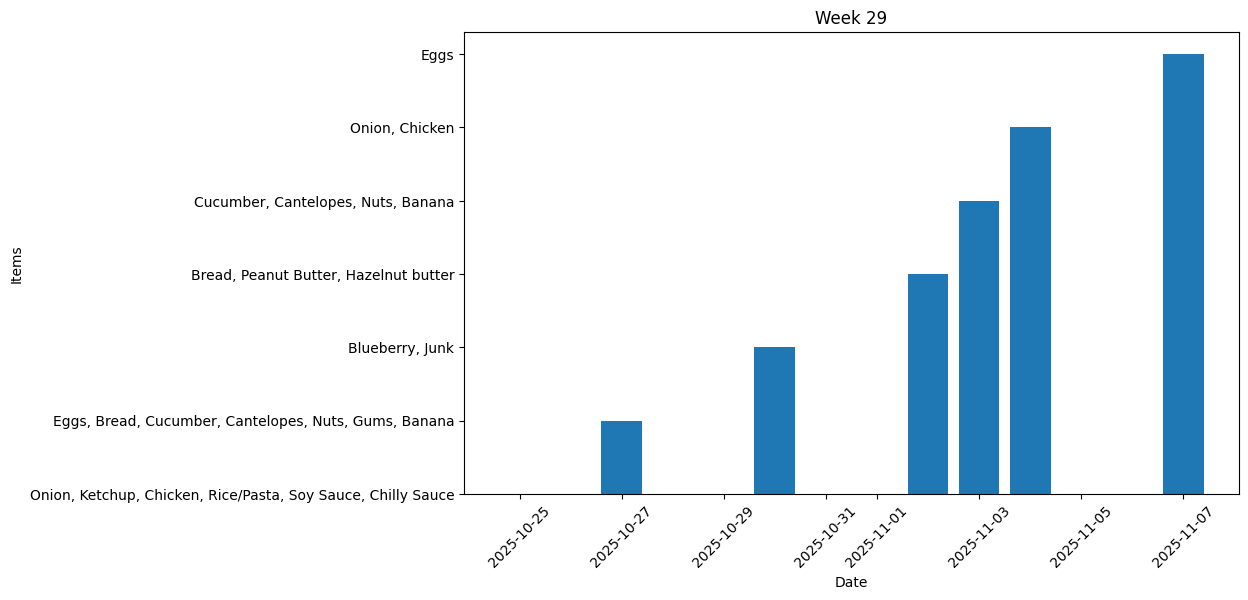

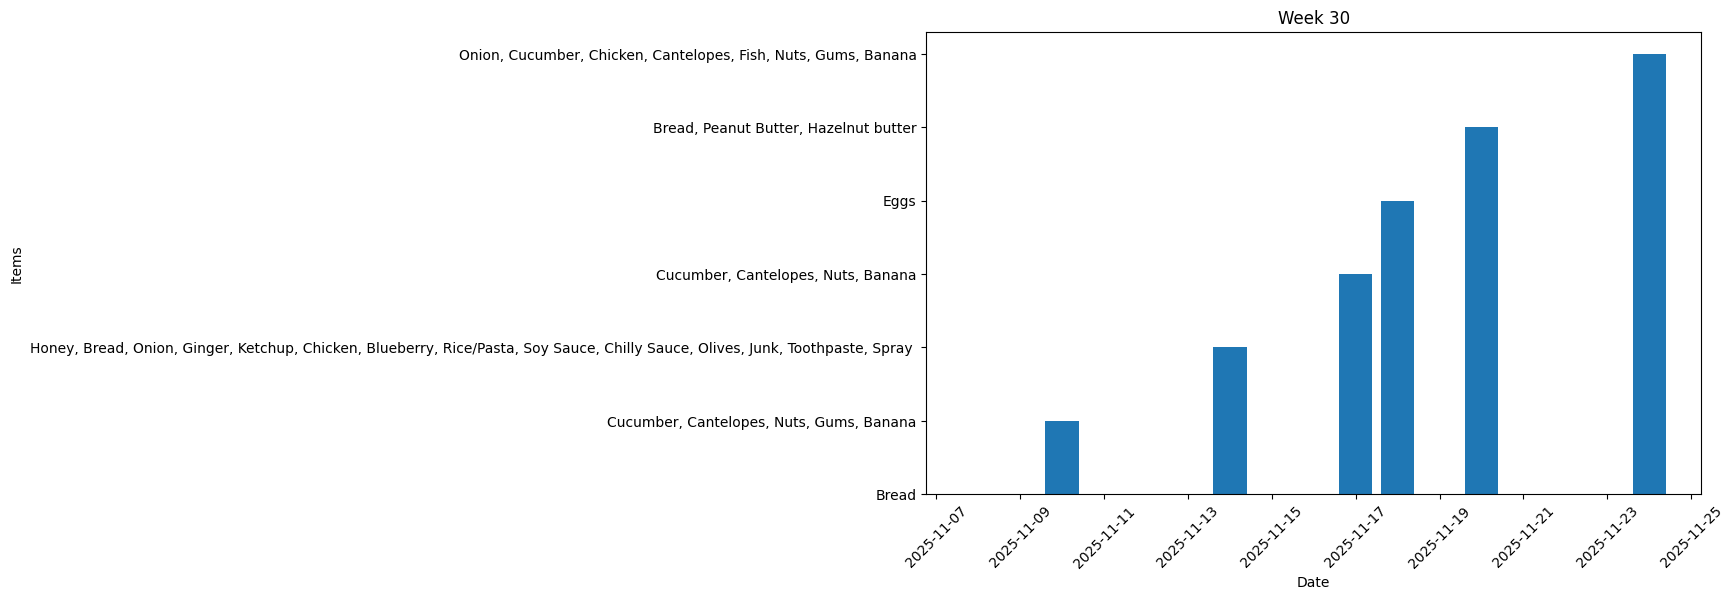

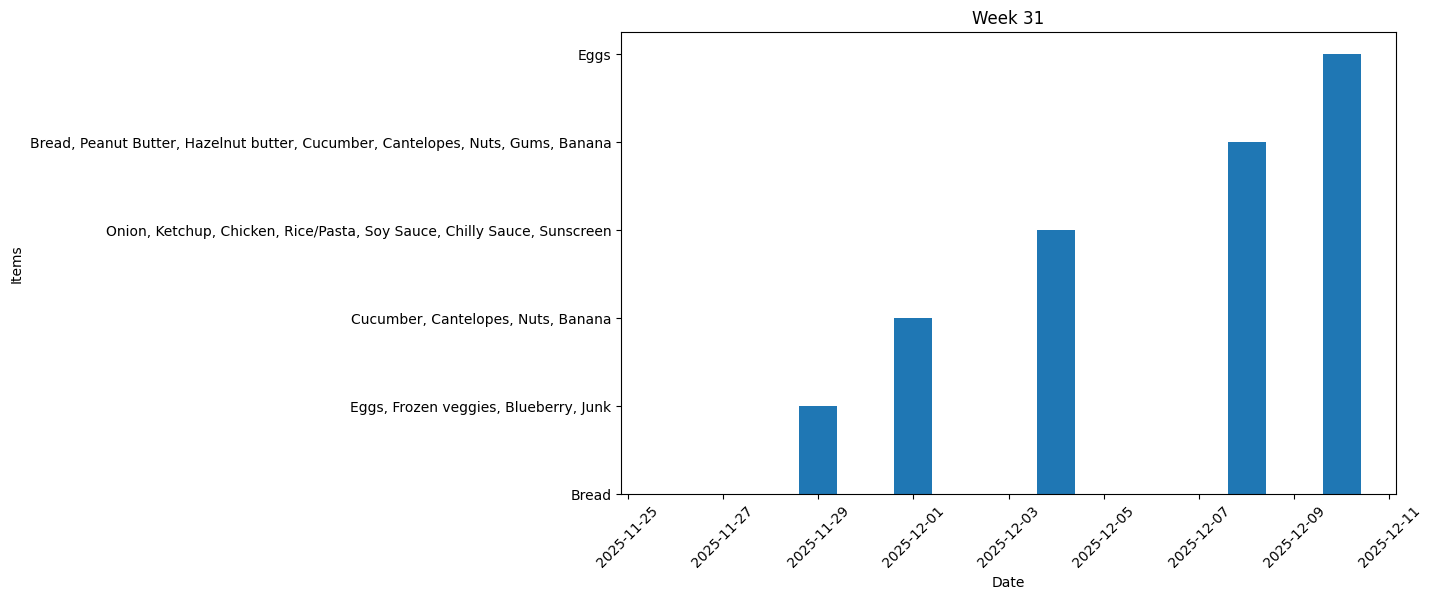

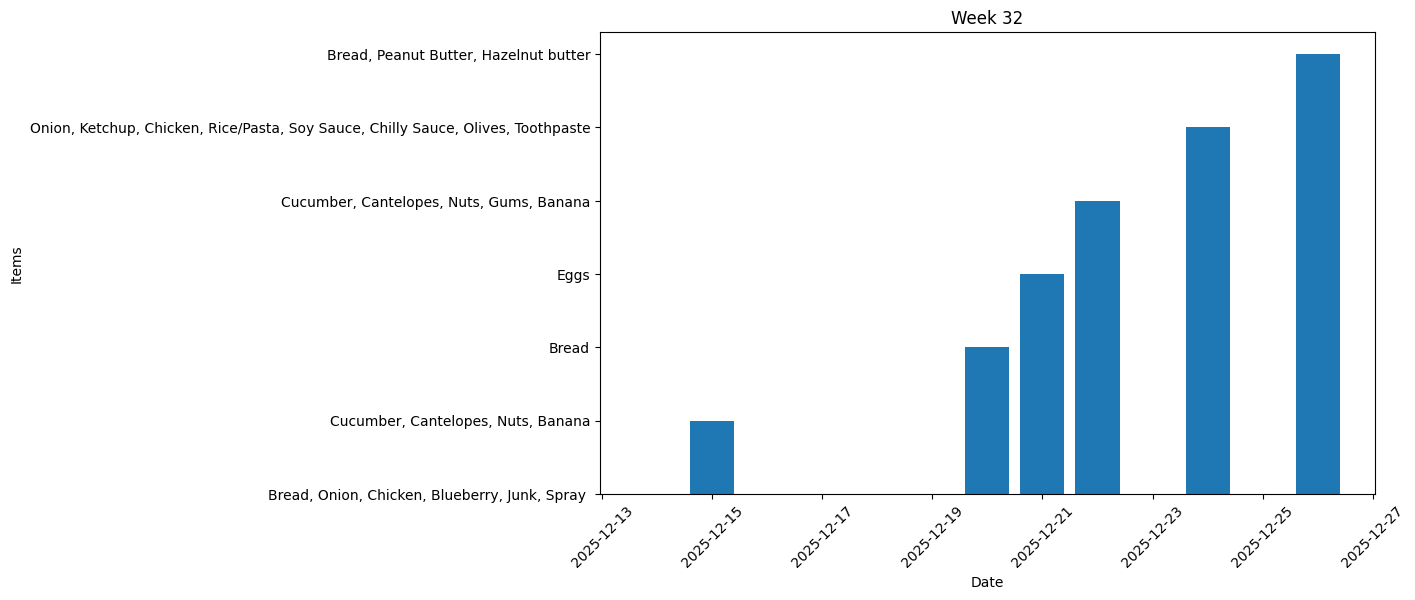

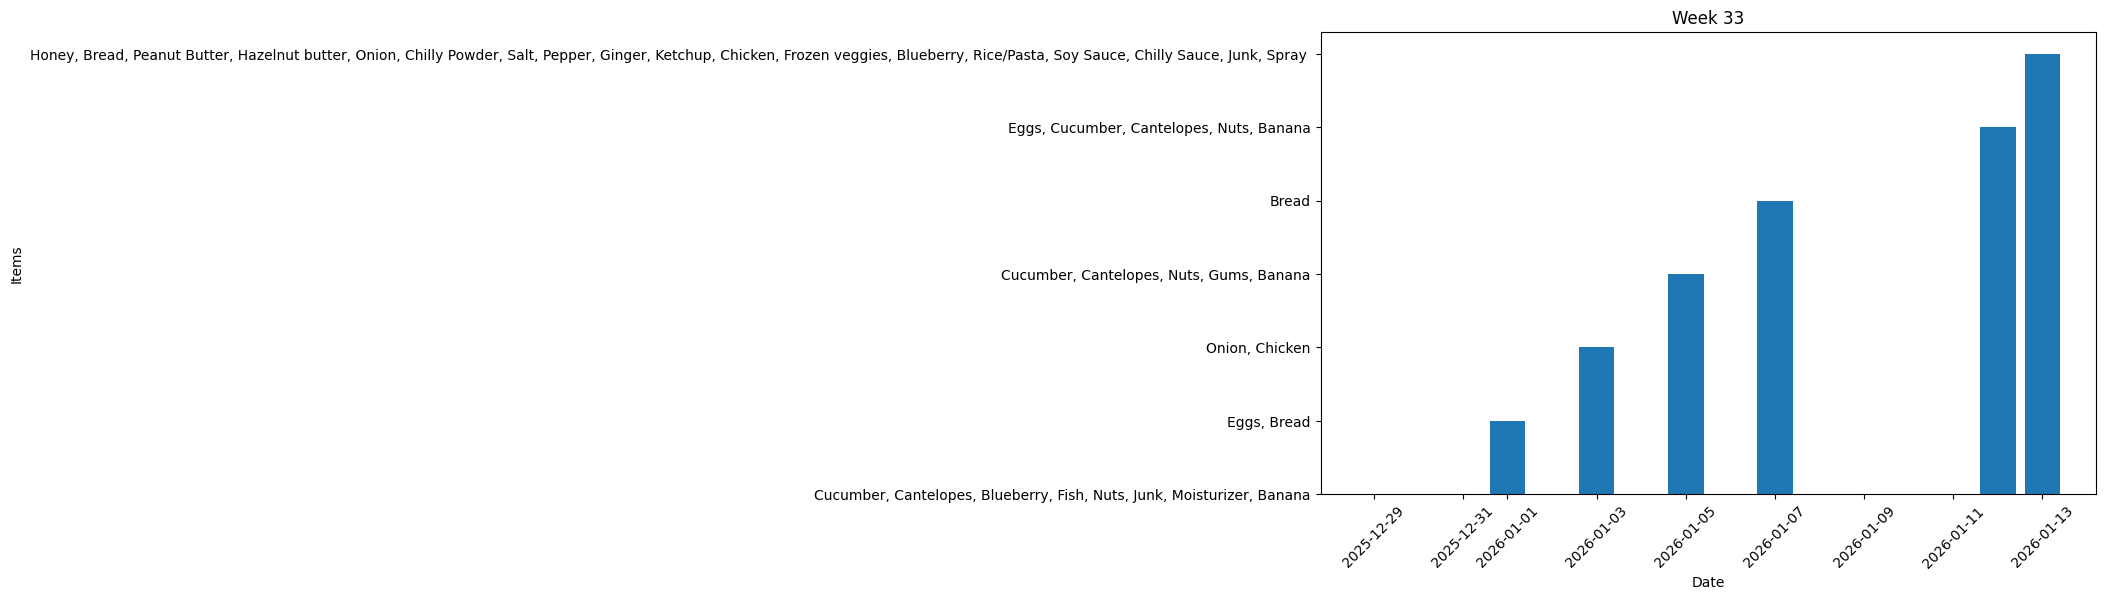

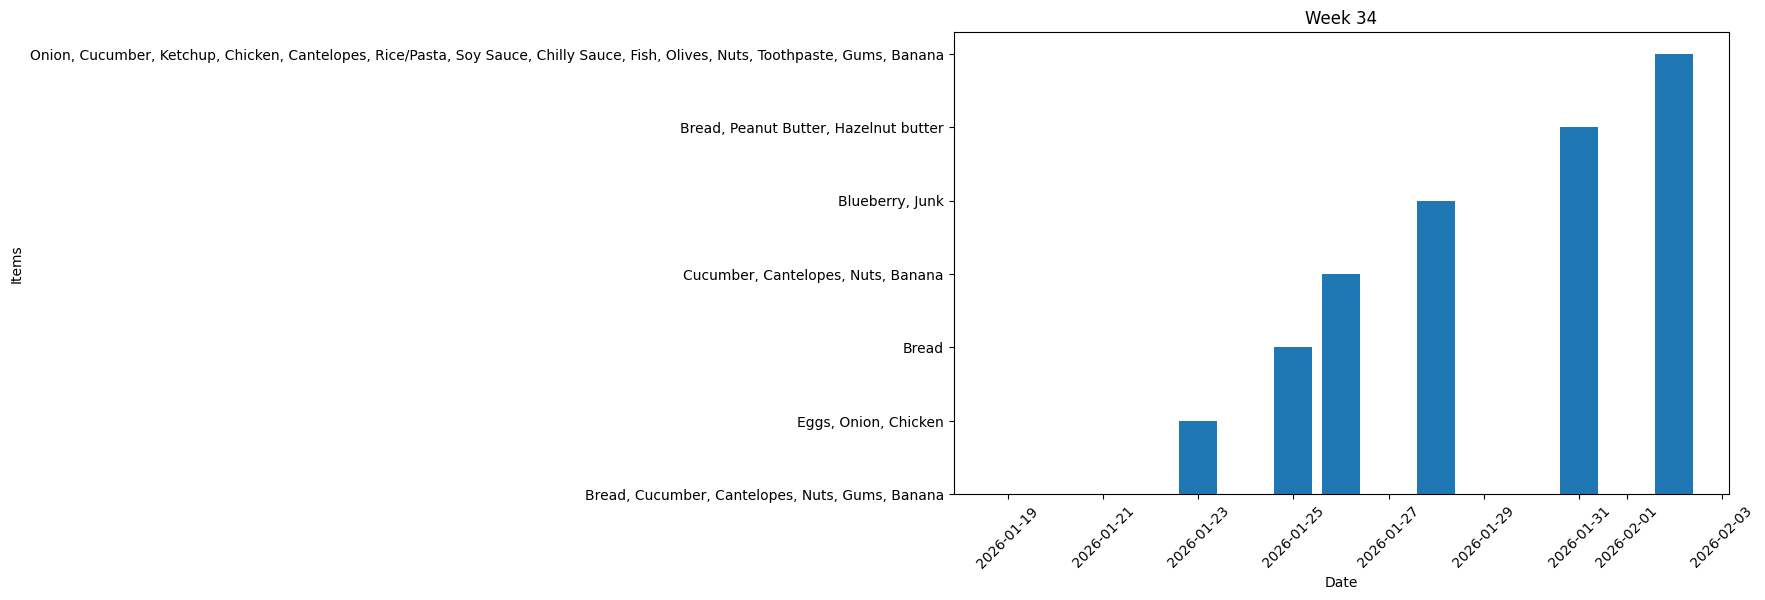

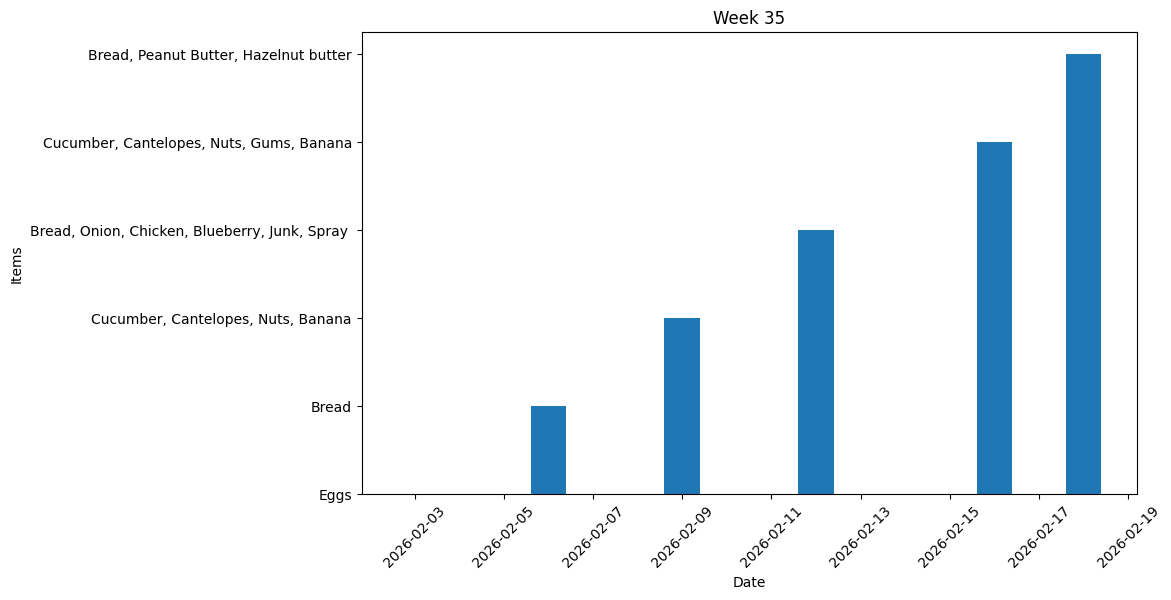

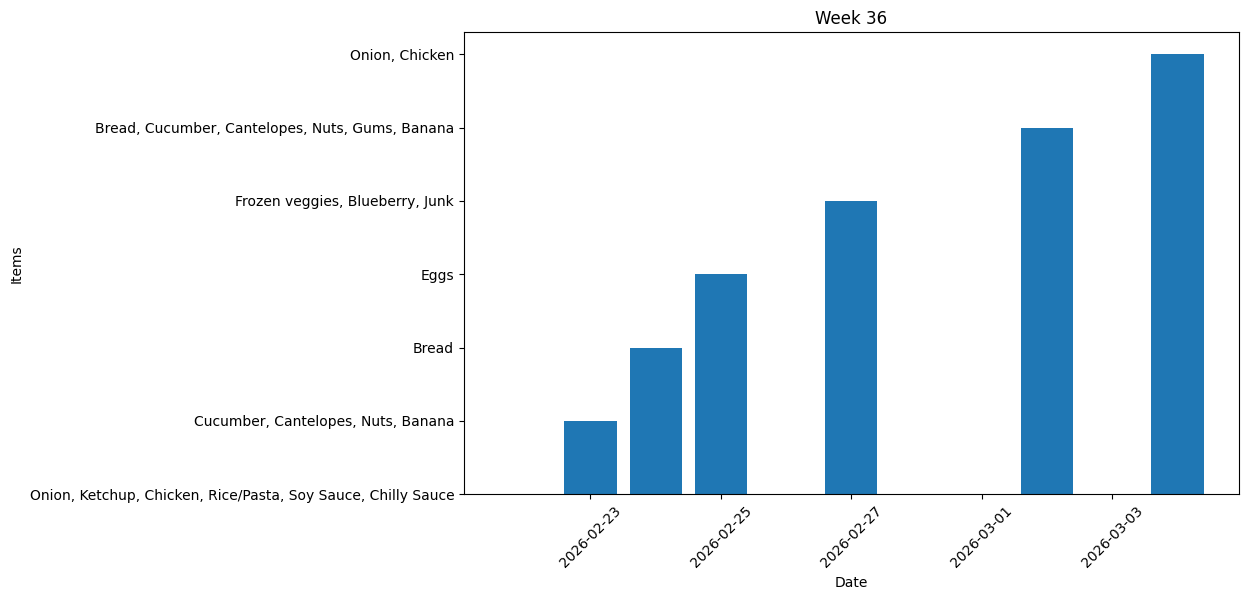

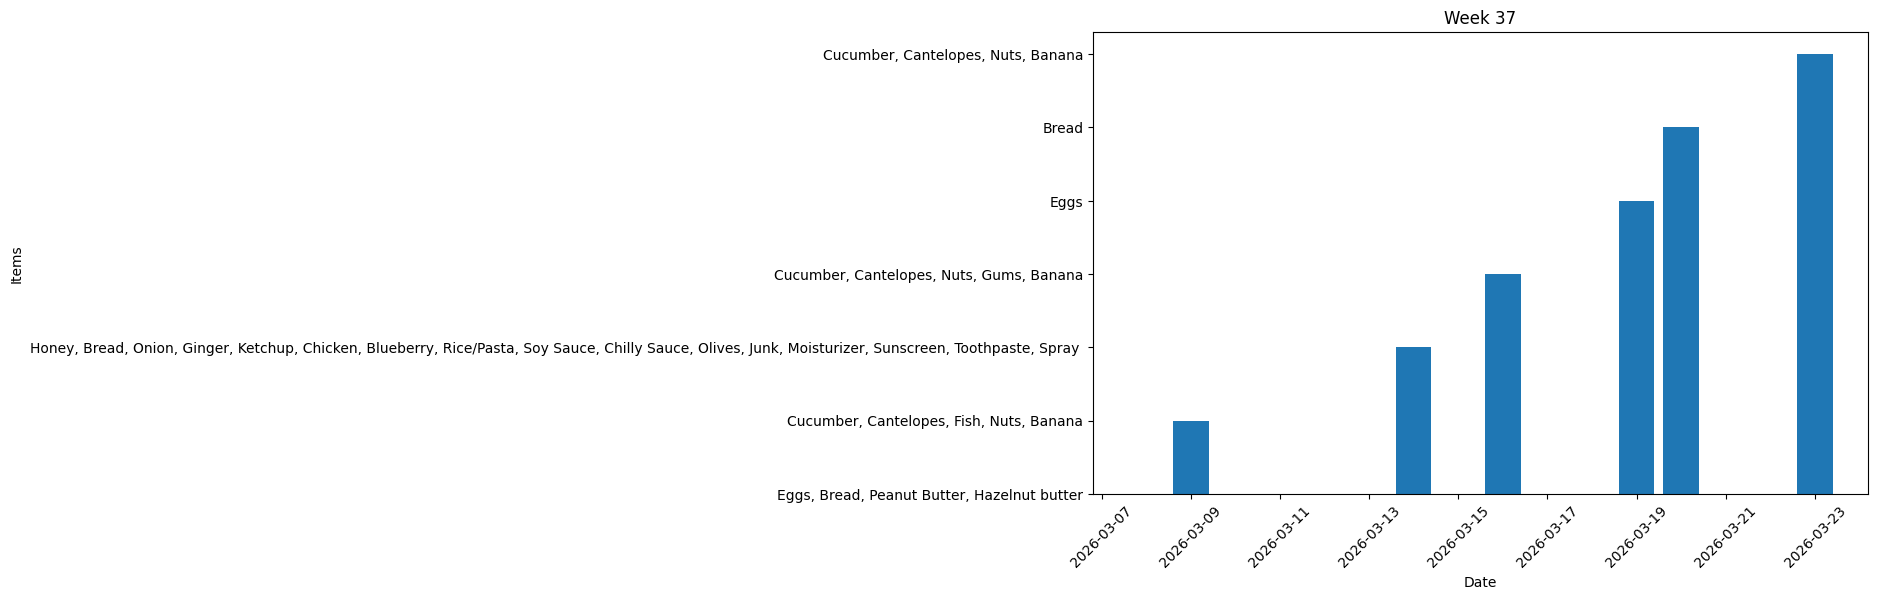

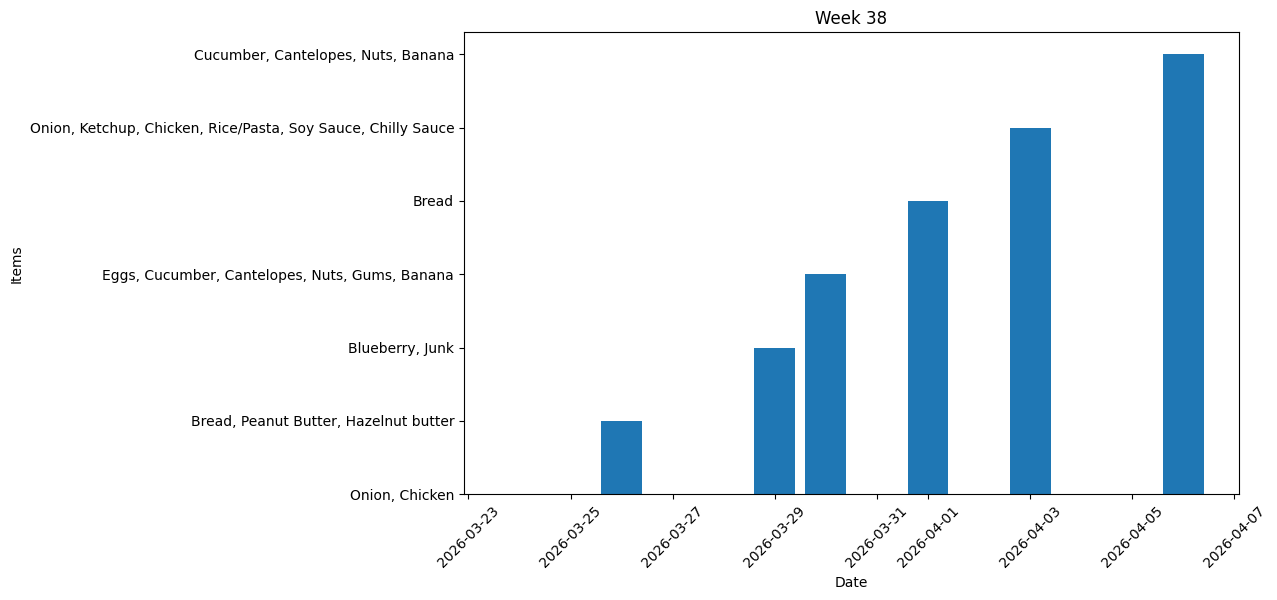

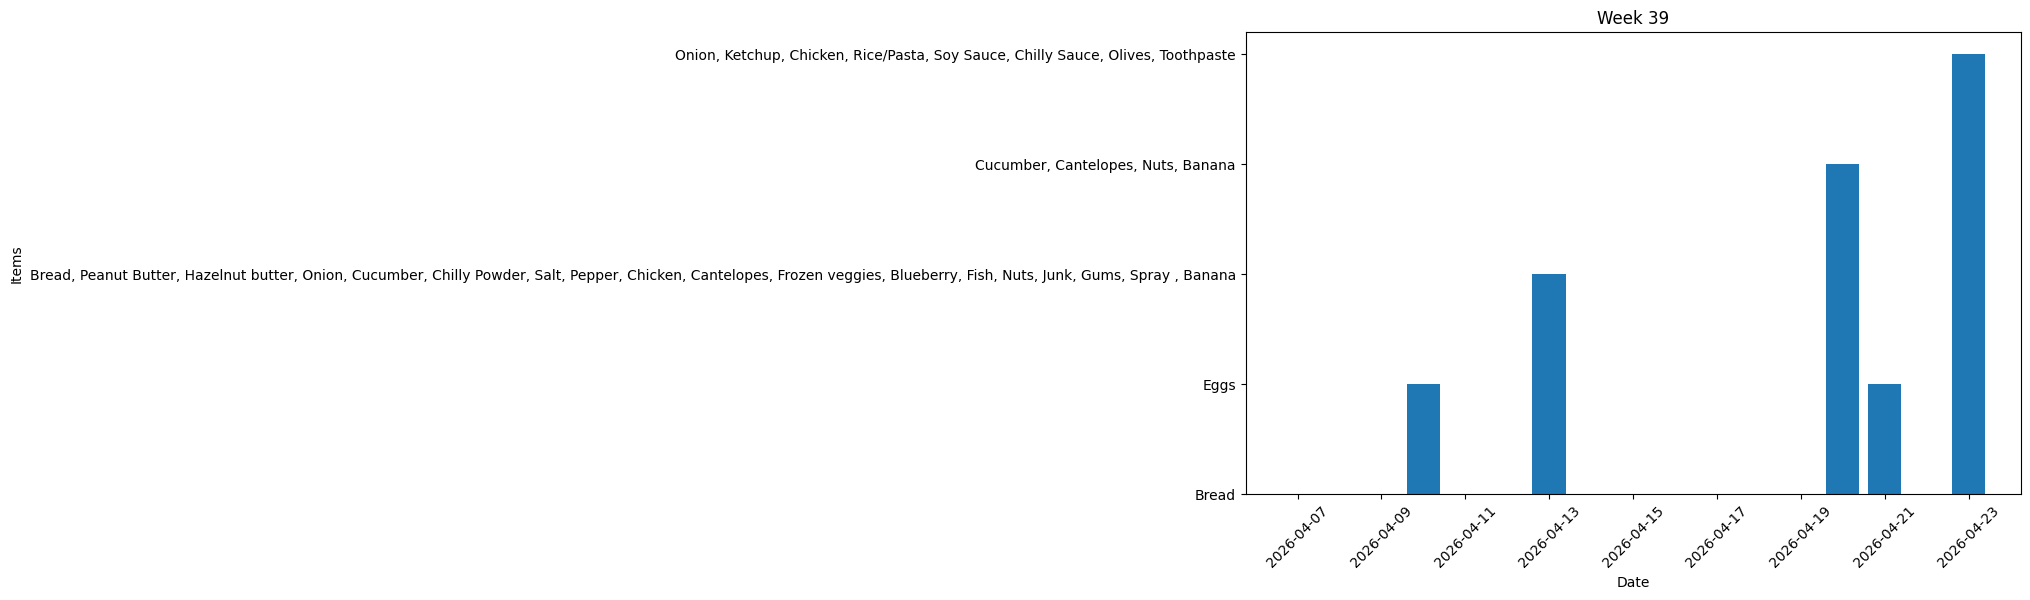

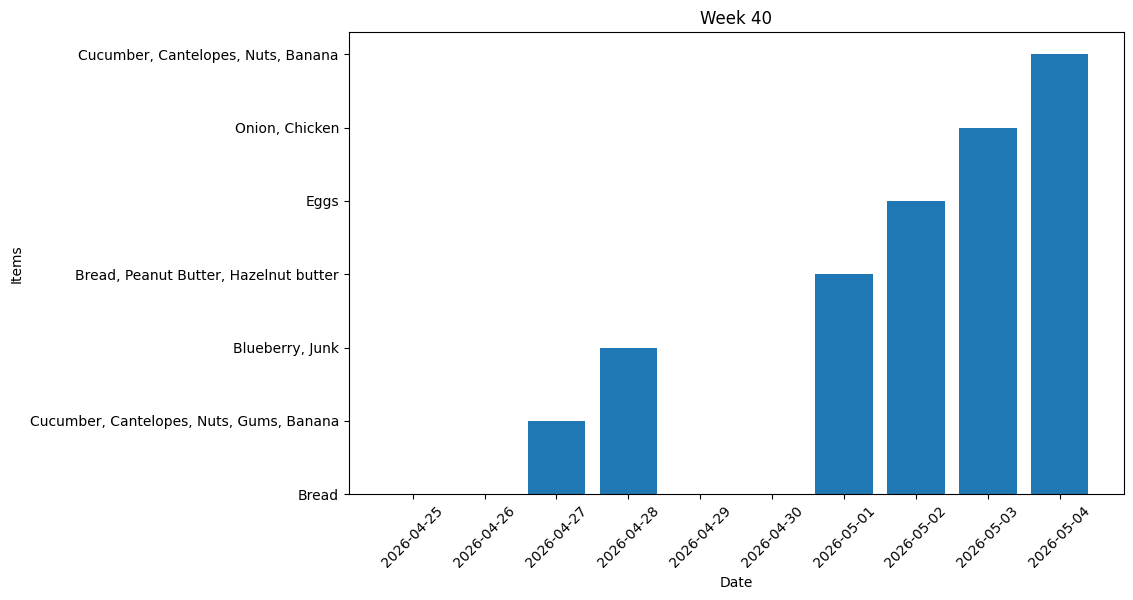

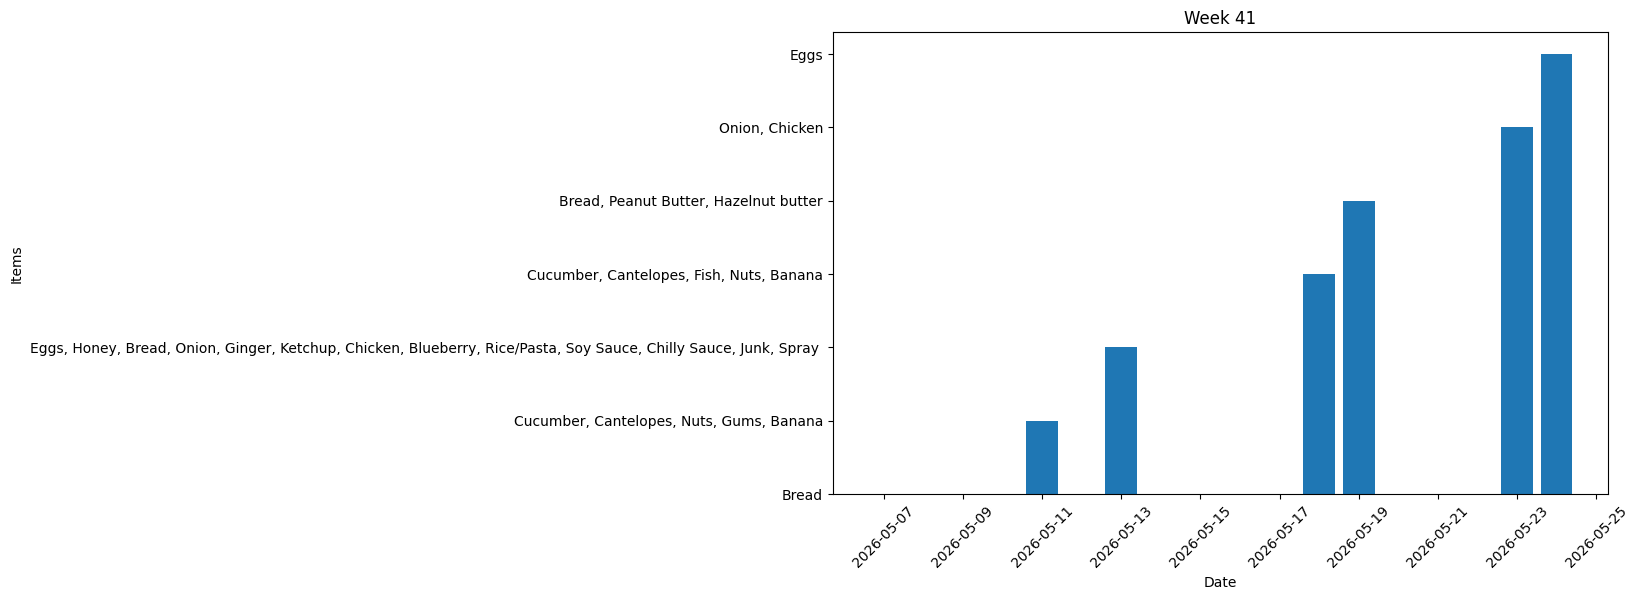

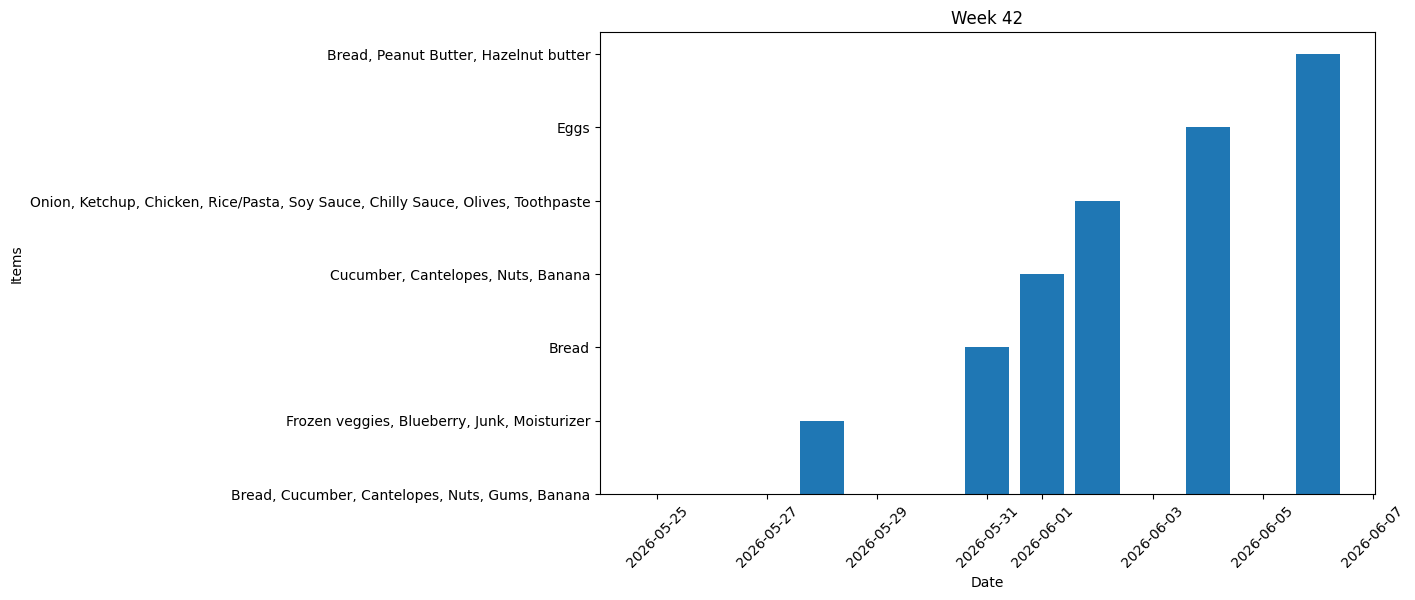

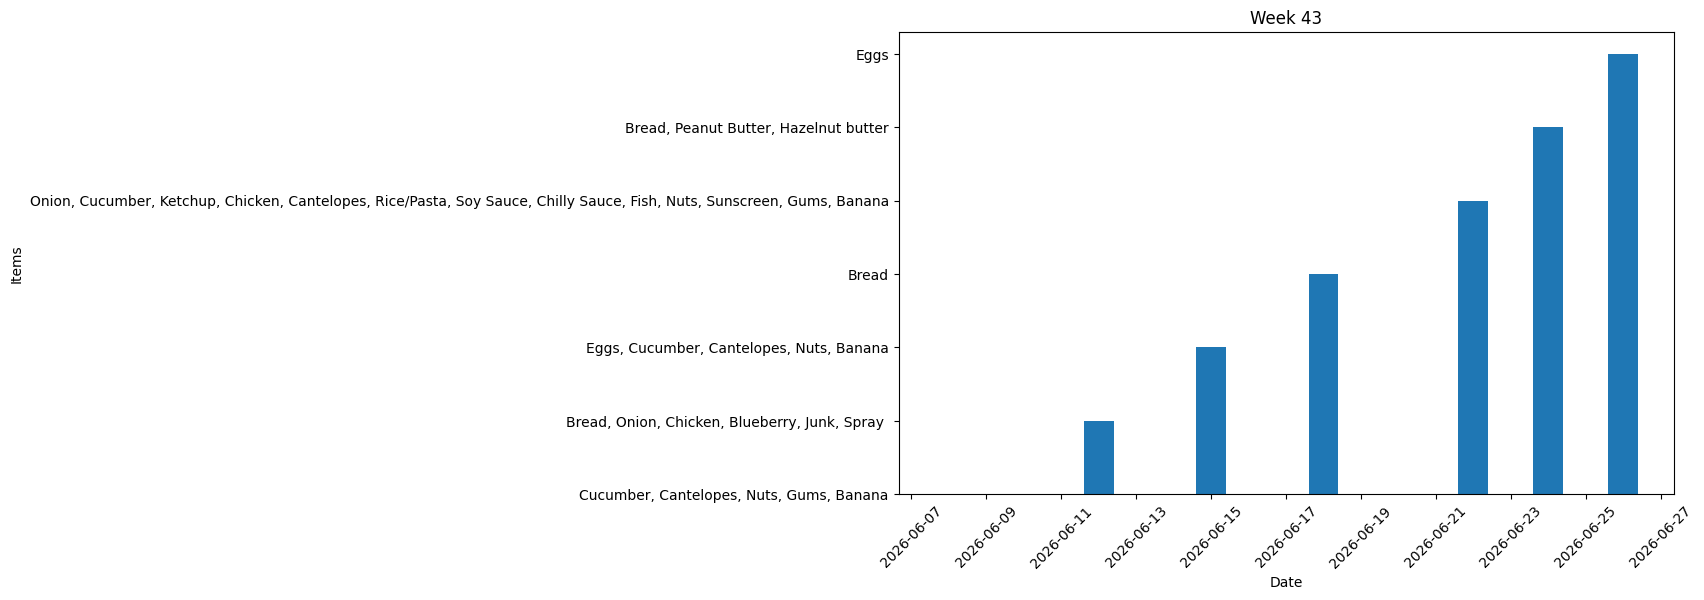

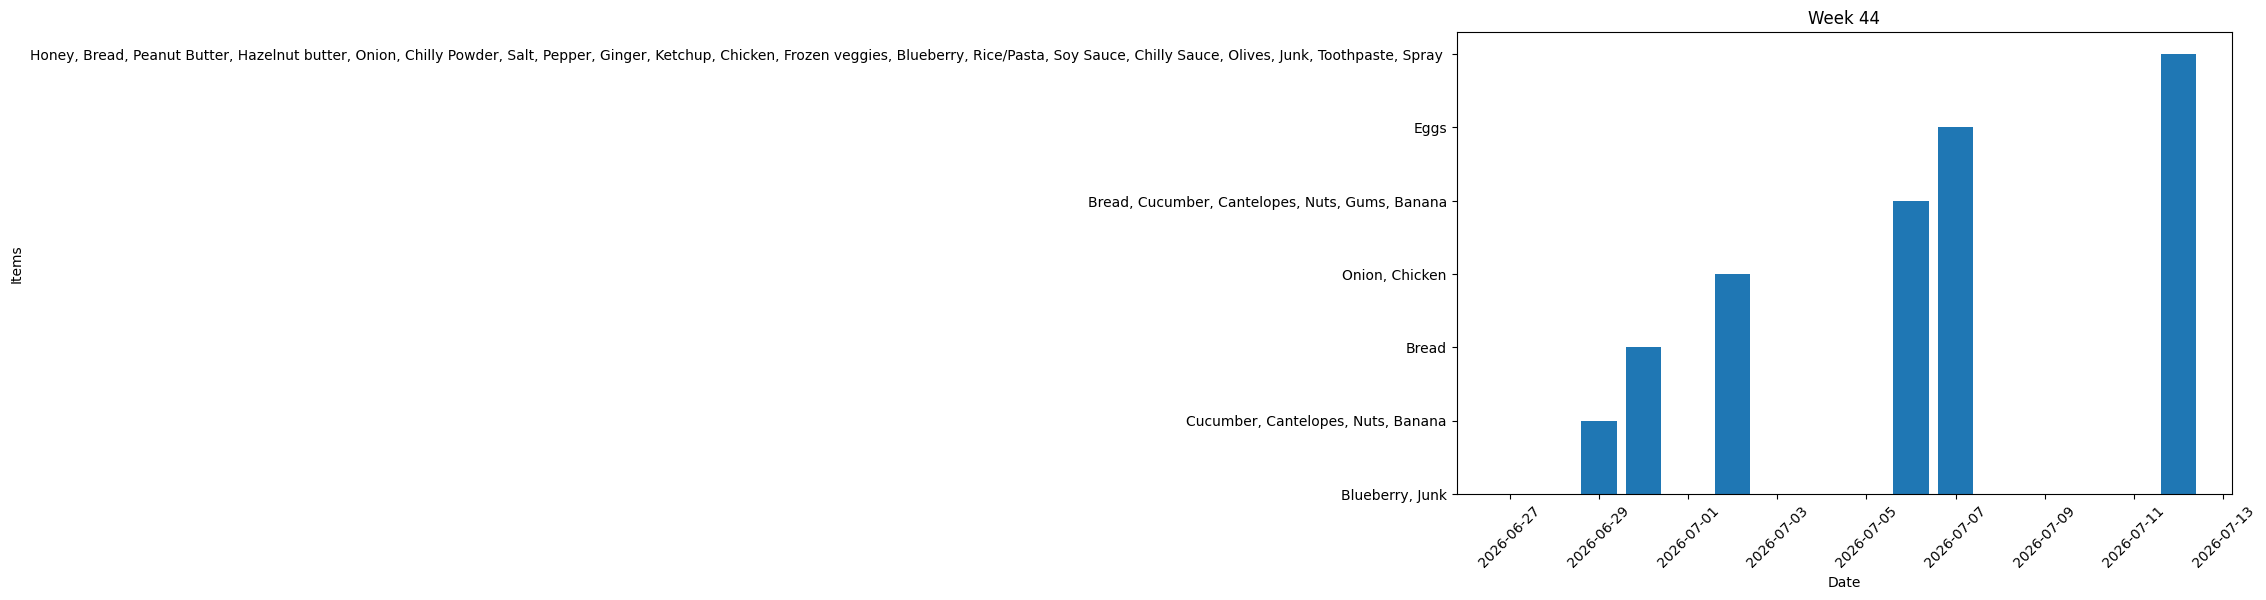

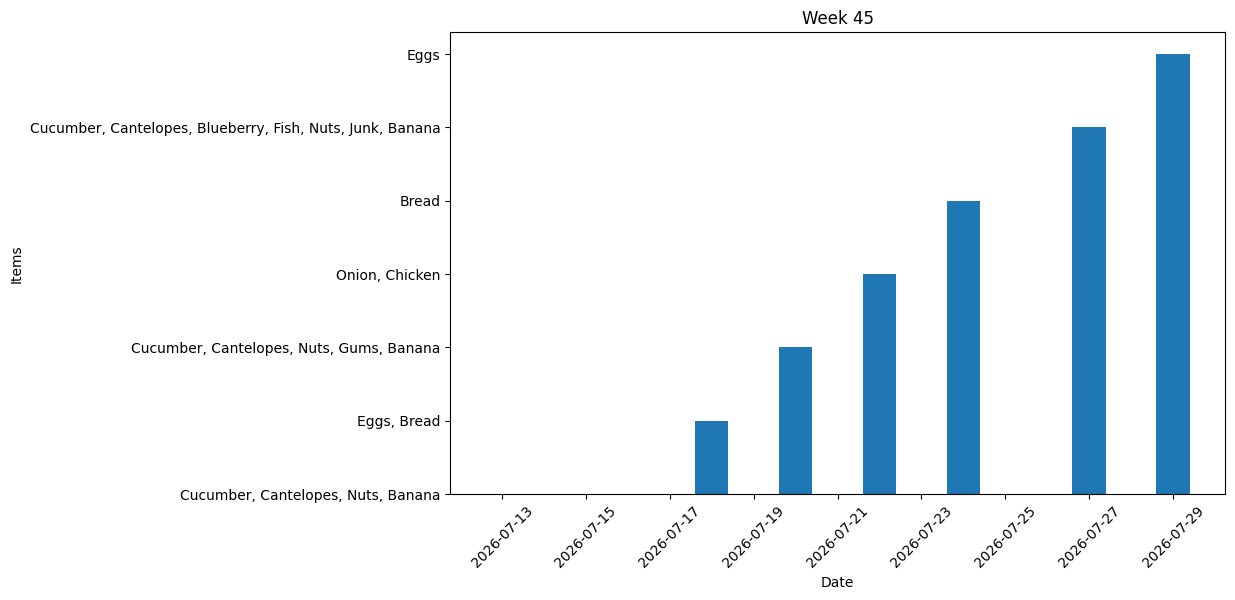

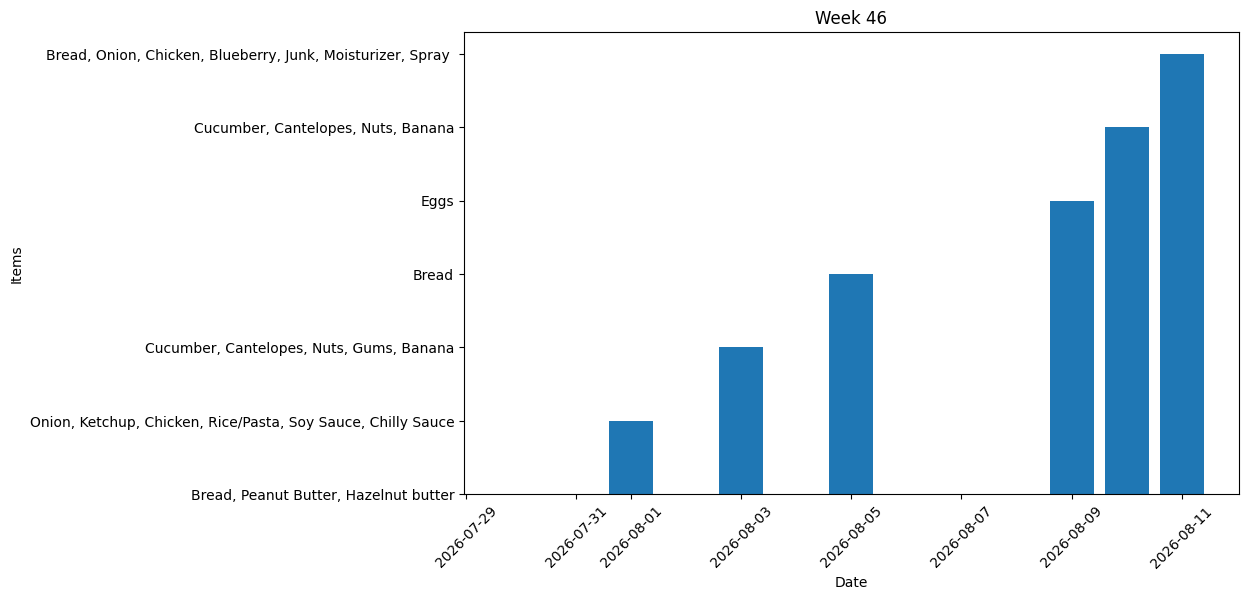

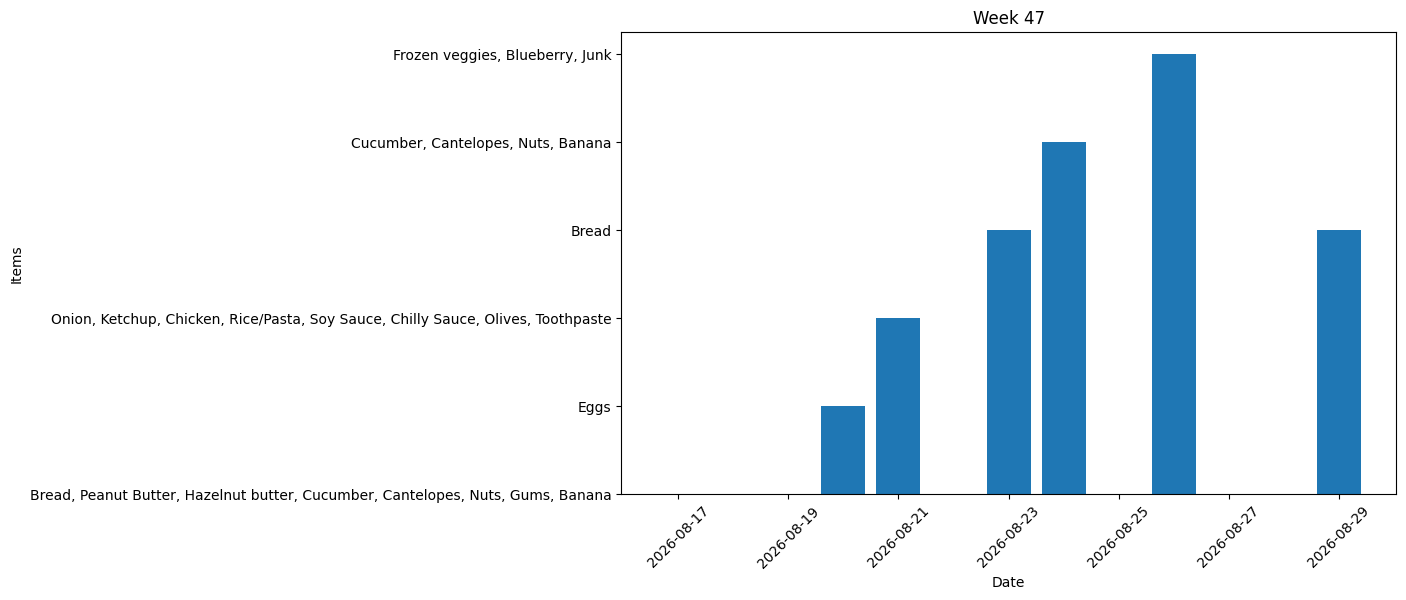

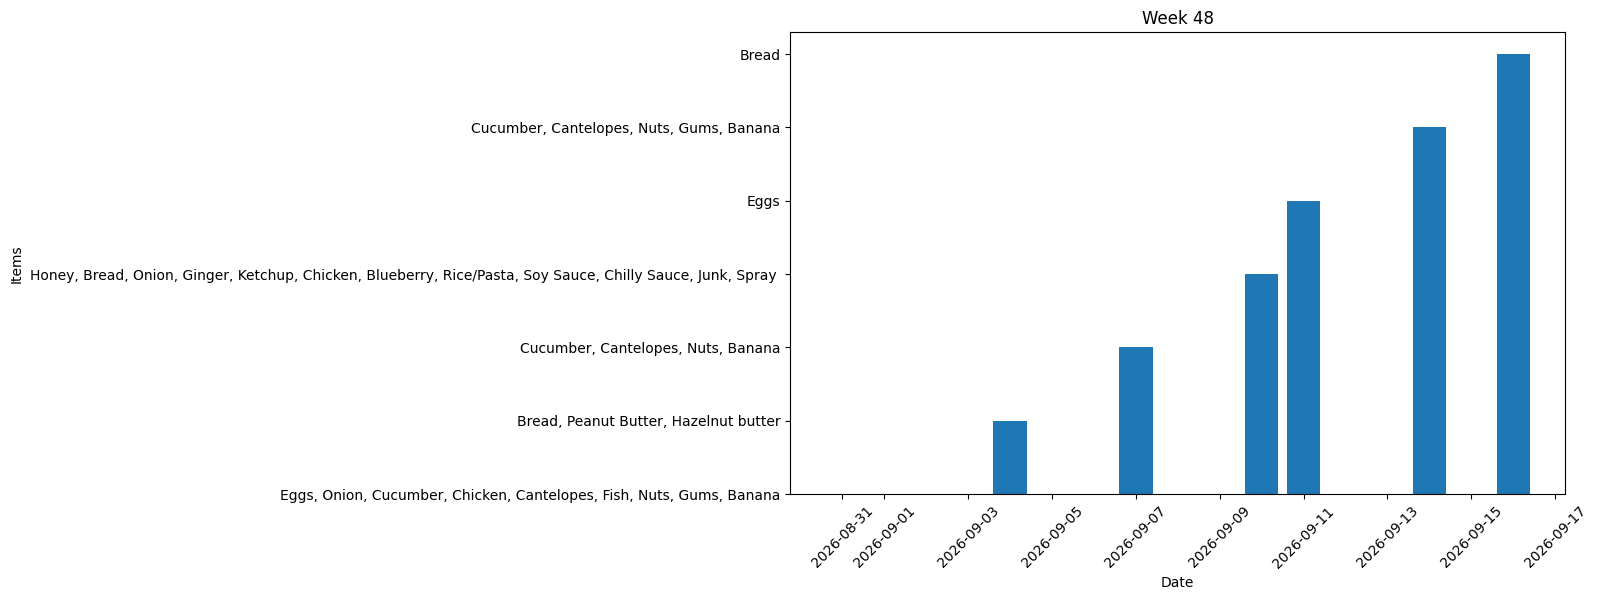

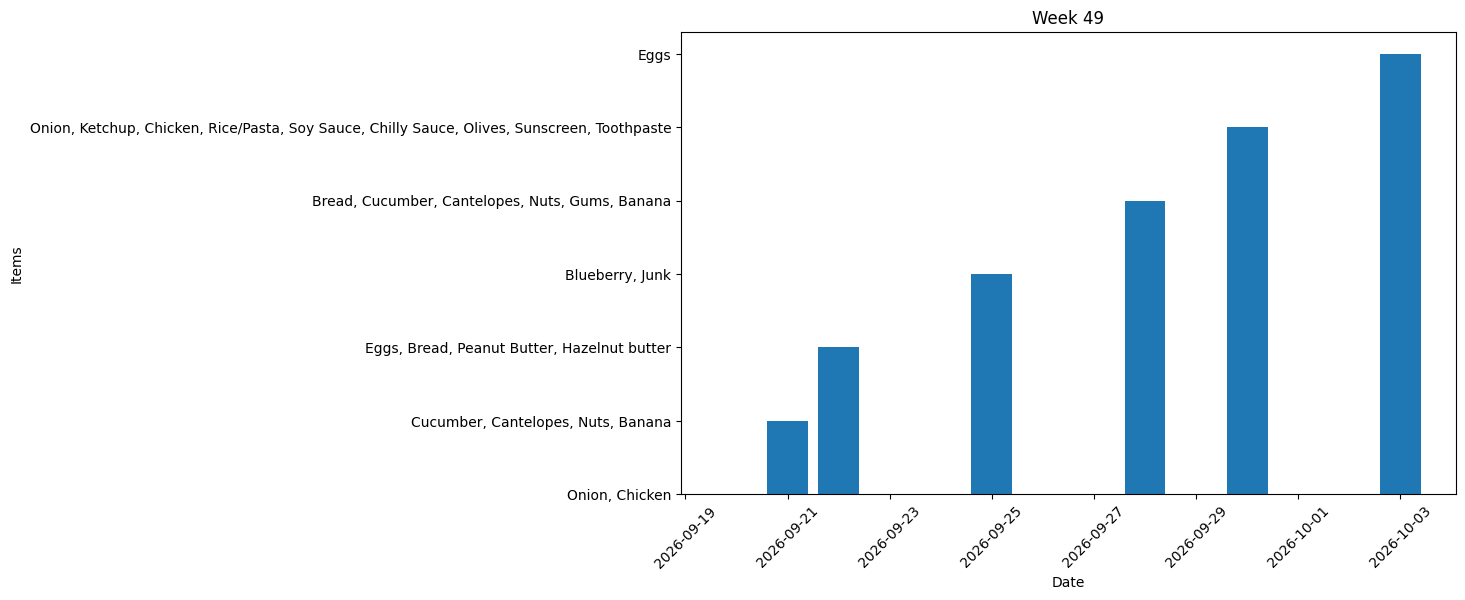

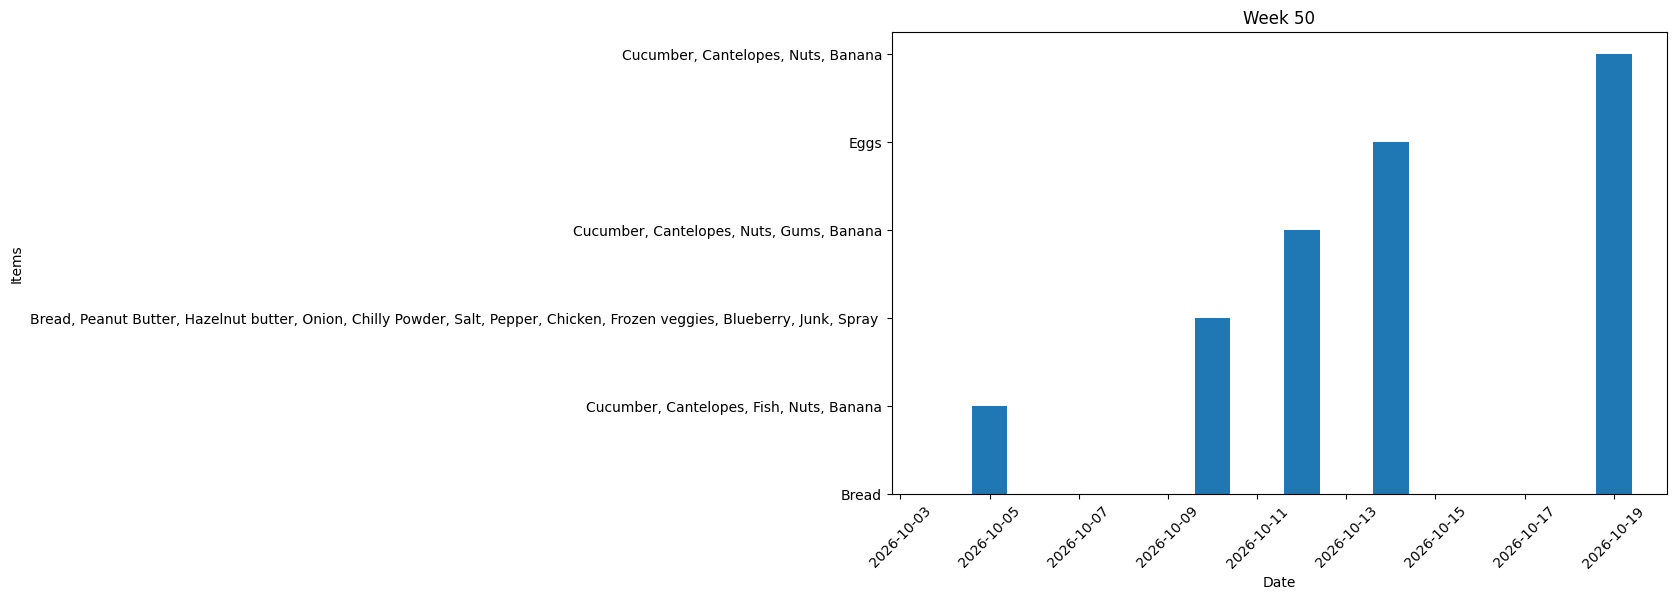

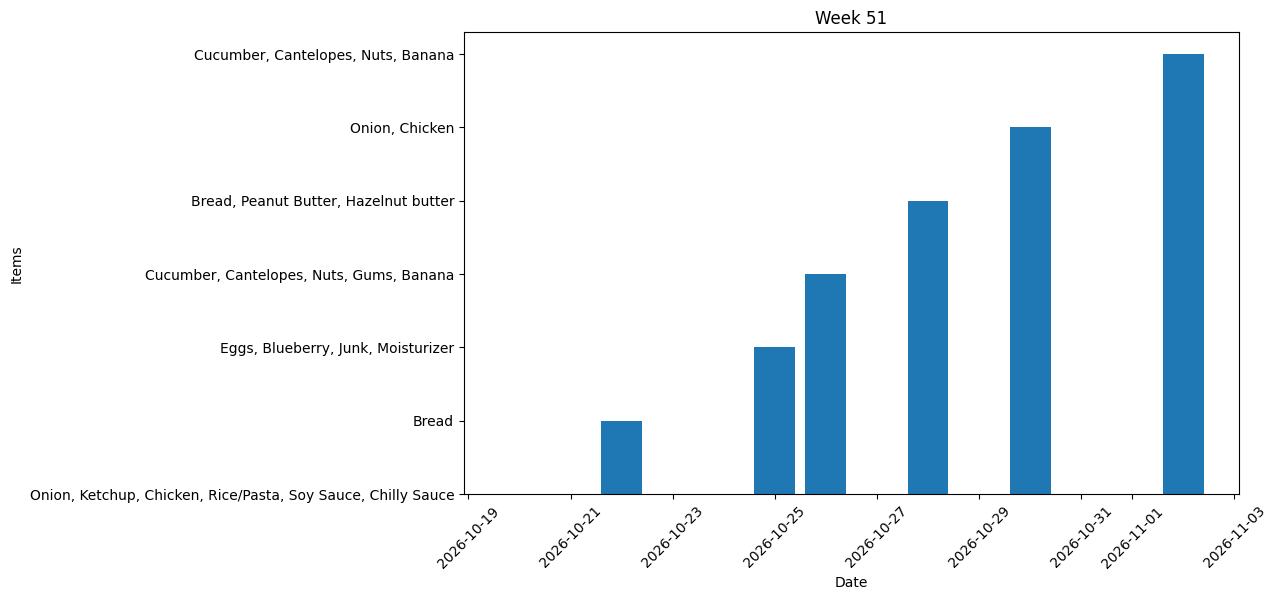

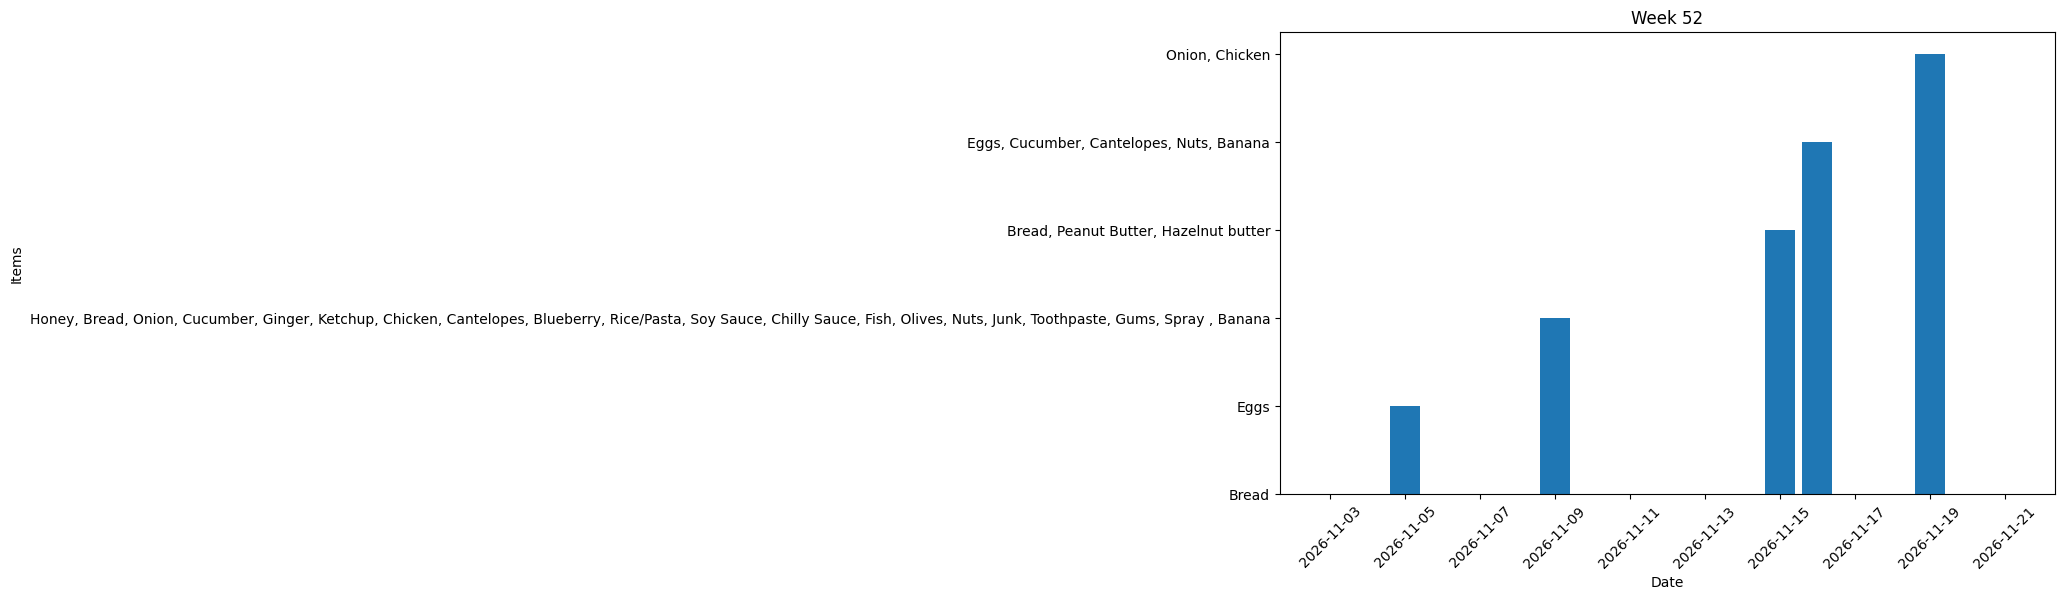

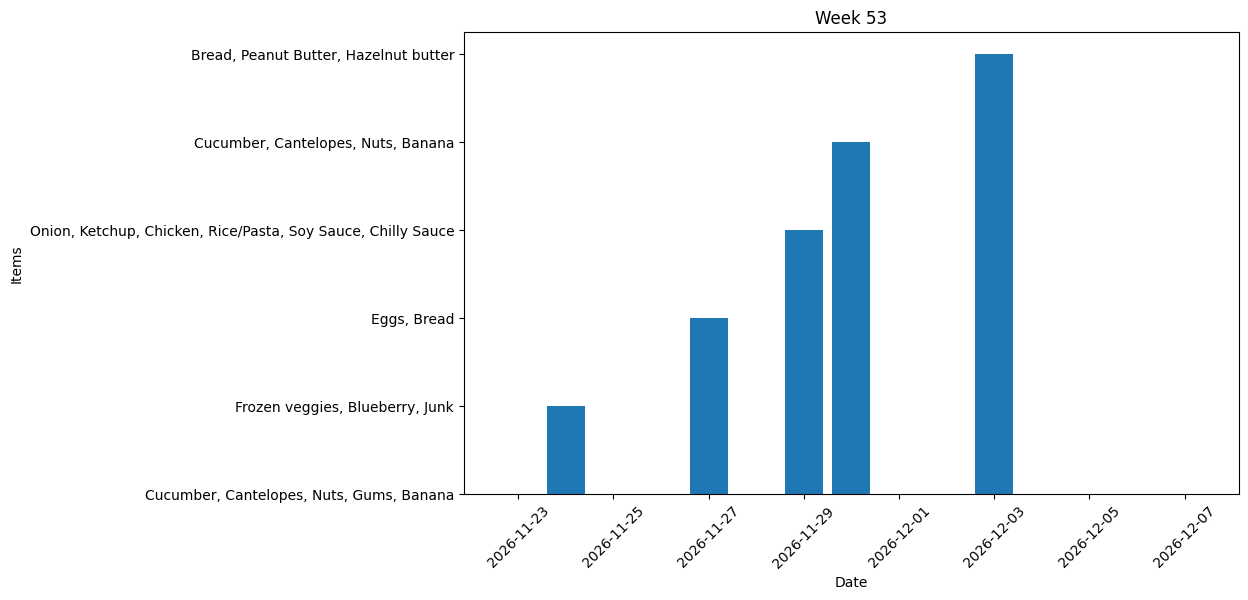

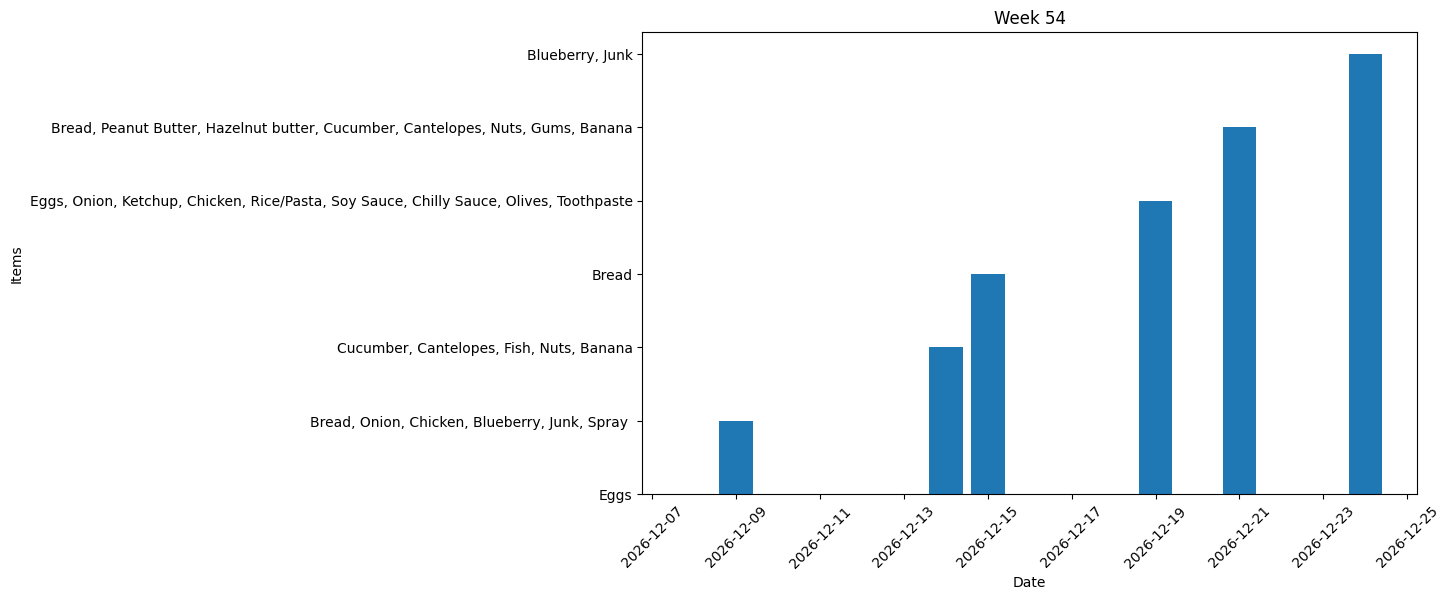

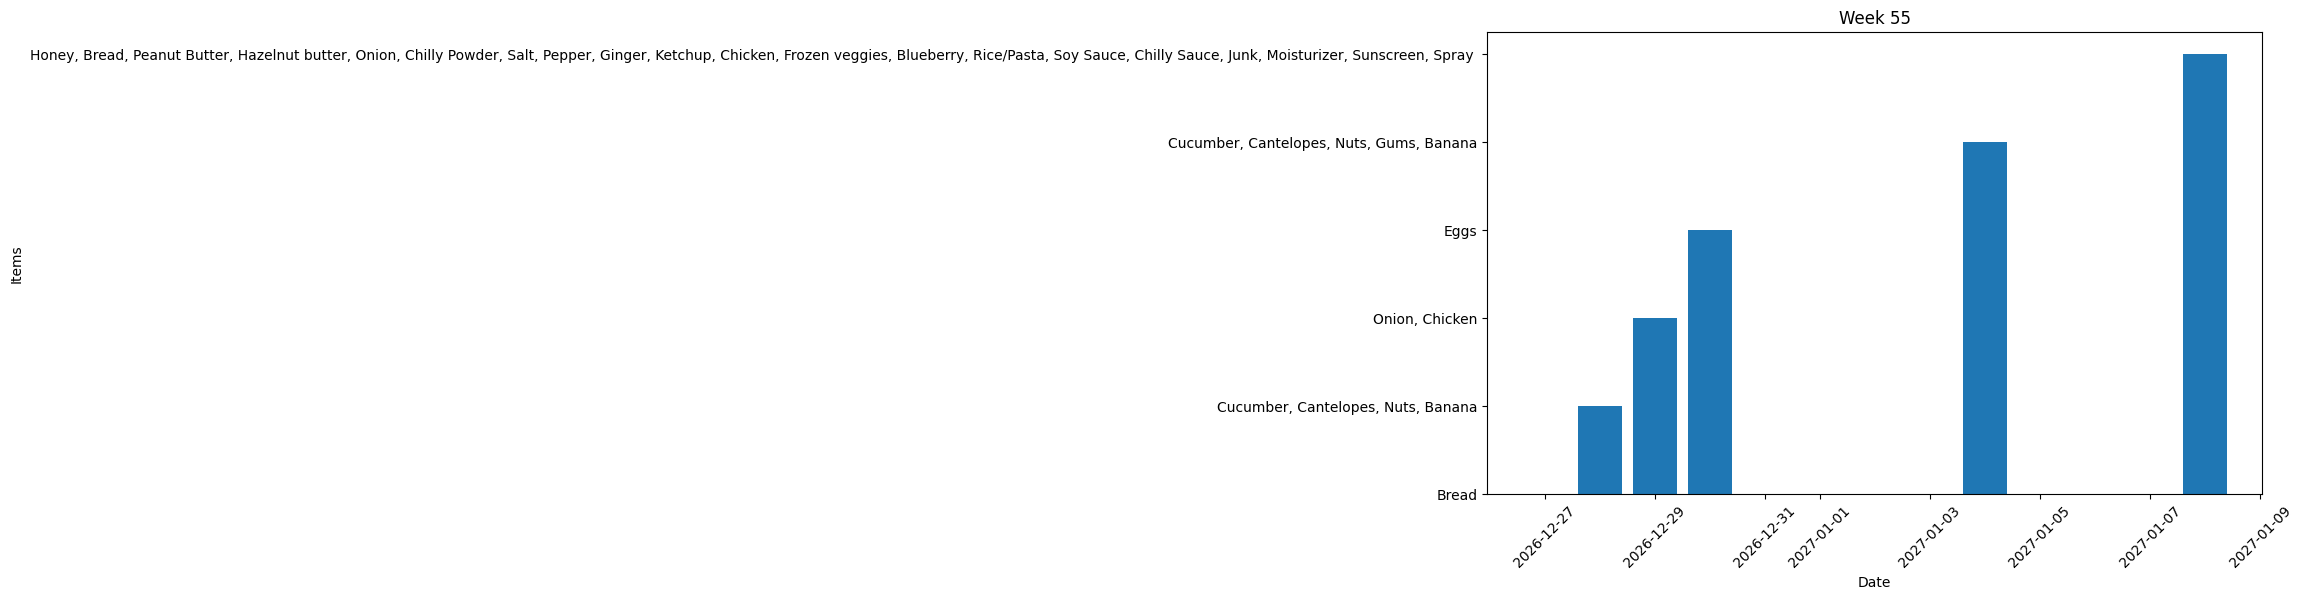

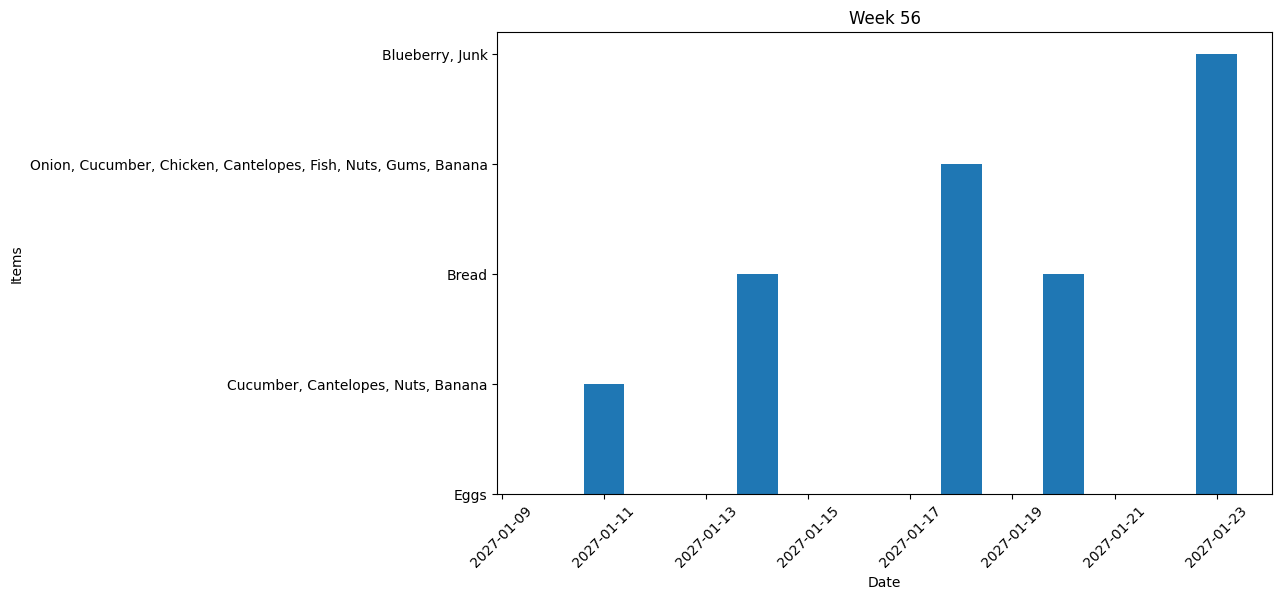

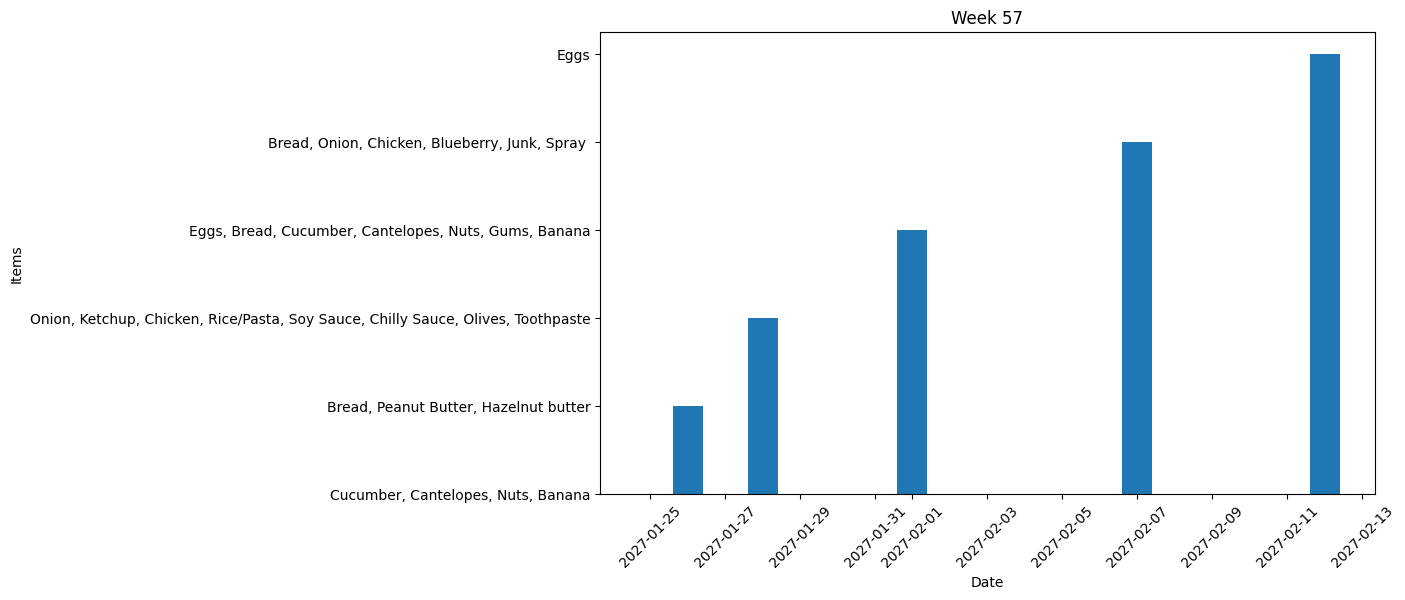

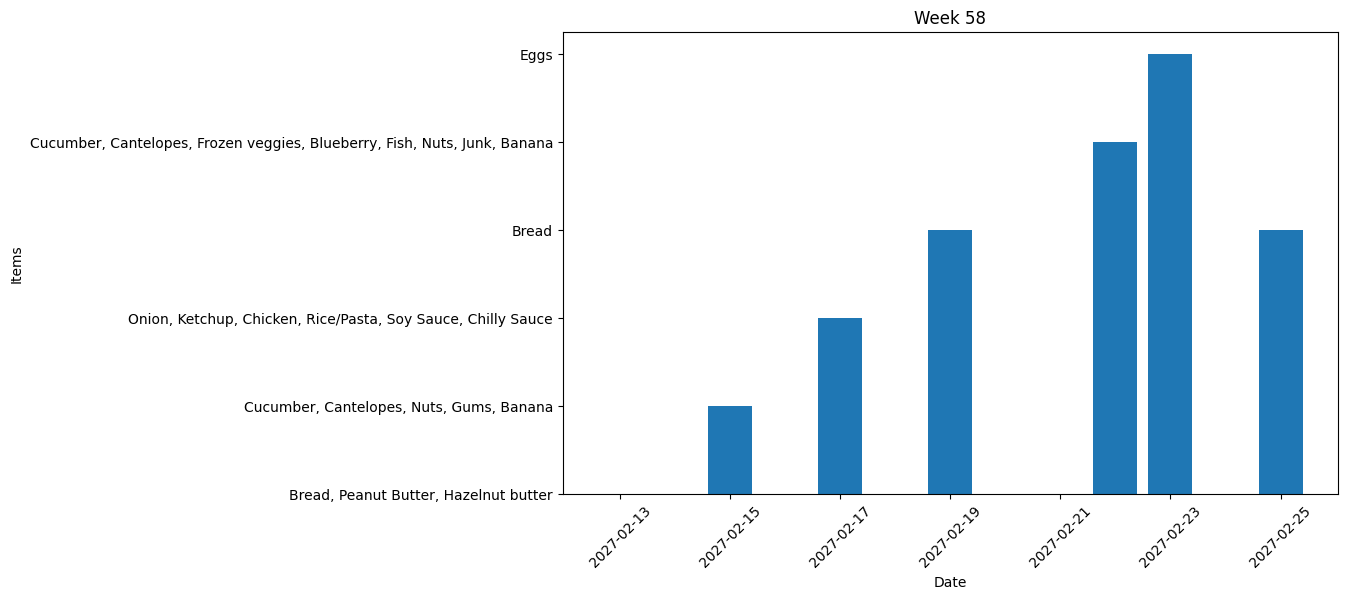

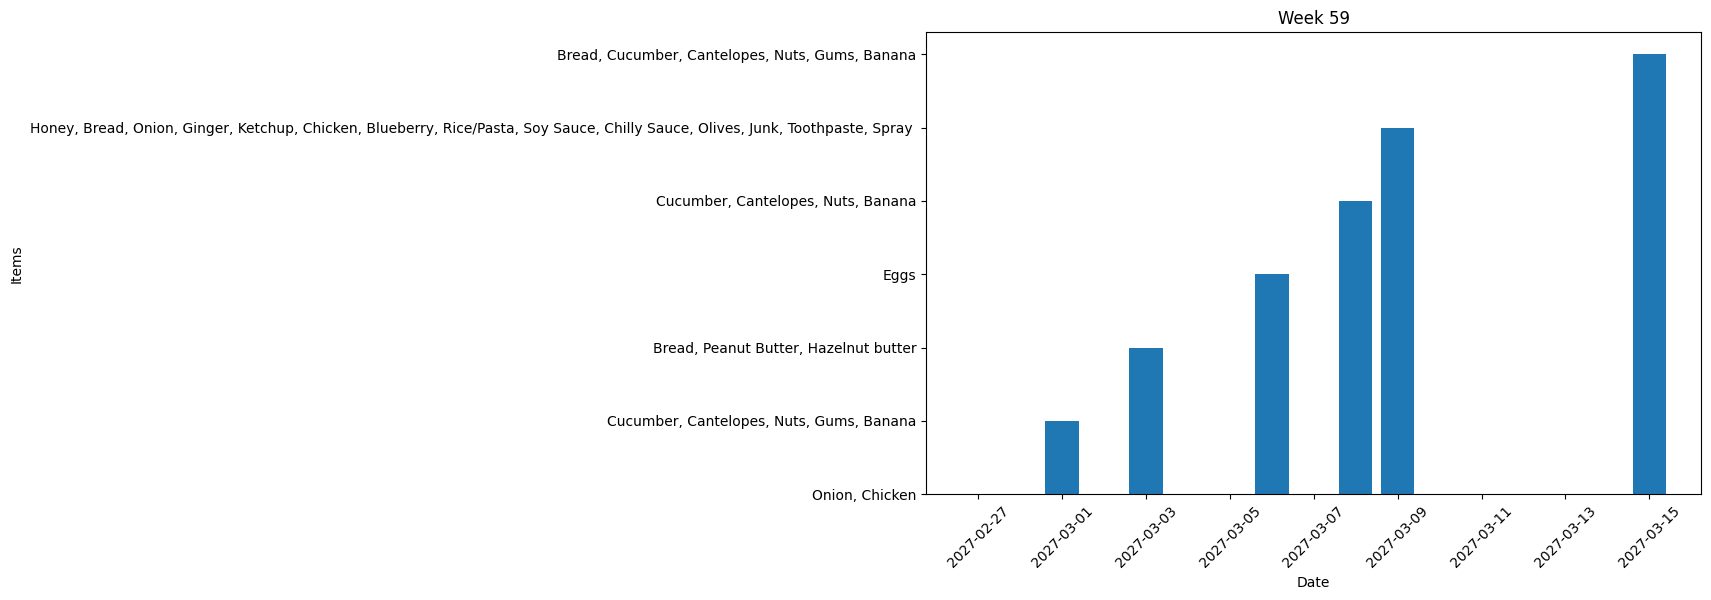

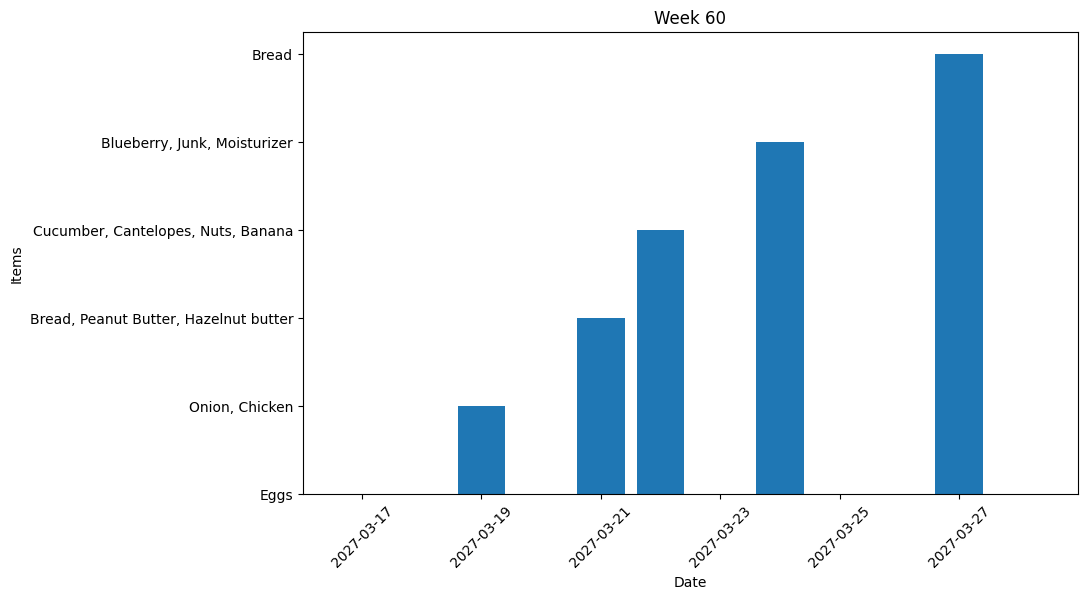

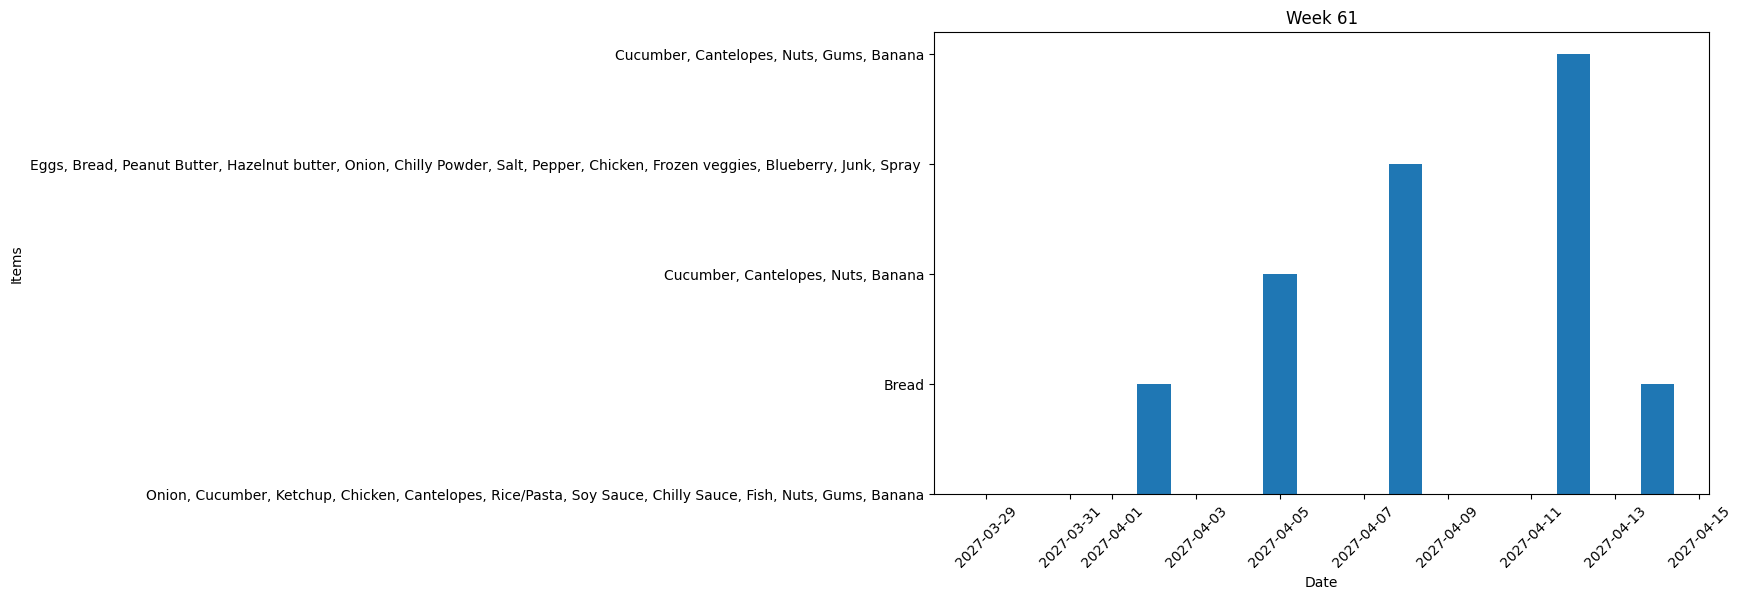

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
excel_file = '/content/Order_Schedule.xlsx'
df = pd.read_excel(excel_file)

# Define the number of rows to loop through
chunk_size = 7
week_number = 1

# Loop through the DataFrame in chunks
for start_row in range(1, len(df), chunk_size):
    # Select the chunk of data
    chunk = df.iloc[start_row:start_row + chunk_size]

    # Create a plot
    plt.figure(figsize=(10, 6))
    plt.bar(chunk['Date'], chunk['Items'])

    # Customize the plot
    plt.xlabel('Date')
    plt.ylabel('Items')
    plt.title(f'Week {week_number}')
    plt.xticks(rotation=45)

    # Display the plot
    plt.show()

    # Increment the week number
    week_number += 1


/content/Grocery Shopping per week.xlsx /content/Grocery Shopping per week.xlsx


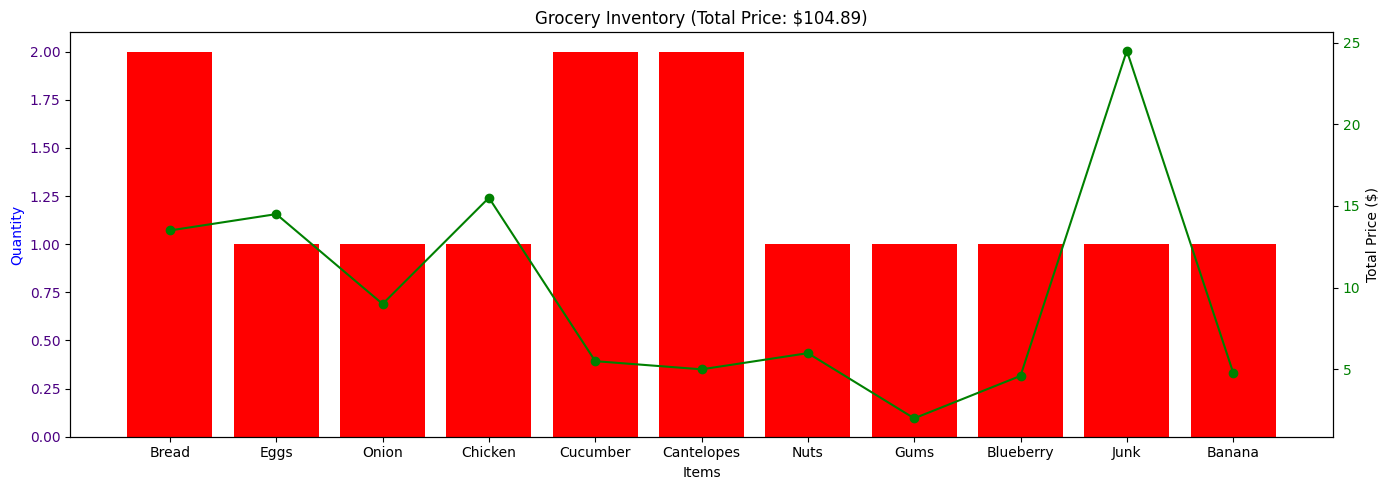

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

class GroceryInventory:
    def __init__(self):
        self.inventory = {}

    def update_inventory(self, items):
        for item, qty, total_price in items:
            if item in self.inventory:
                self.inventory[item]['quantity'] += qty
                self.inventory[item]['total_price'] += total_price
            else:
                self.inventory[item] = {'quantity': qty, 'total_price': total_price}

    def visualize_inventory(self):
        items = list(self.inventory.keys())
        quantities = [self.inventory[item]['quantity'] for item in items]
        total_prices = [self.inventory[item]['total_price'] for item in items]
        total_price = sum(total_prices)

        fig, ax1 = plt.subplots(figsize=(14, 5))

        ax1.bar(items, quantities, color='red', label='Quantity')
        ax1.set_xlabel('Items')
        ax1.set_ylabel('Quantity', color='blue')
        ax1.tick_params(axis='y', labelcolor='indigo')

        ax2 = ax1.twinx()
        ax2.plot(items, total_prices, color='green', marker='o', label='Total Price')
        ax2.set_ylabel('Total Price ($)', color='black')
        ax2.tick_params(axis='y', labelcolor='green')

        plt.title(f'Grocery Inventory (Total Price: ${total_price:.2f})')
        fig.tight_layout()
        plt.show()

def main():
    inventory = GroceryInventory()

    file_path = input("/content/Grocery Shopping per week.xlsx ")
    df = pd.read_excel(file_path)

    week_items = []
    for index, row in df.iterrows():
        name = row[0]
        qty = row[1]
        total_price = row[2]
        week_items.append((name, int(qty), float(total_price)))

    inventory.update_inventory(week_items)
    inventory.visualize_inventory()

if __name__ == "__main__":
    main()
